In [1]:
from collections import Counter
import numpy as np
from visualize_events.snomed import *
from visualize_events.data import *
from visualize_events.algorithms import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pydot
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import plotly
import plotly.express as px
from shapely.ops import voronoi_diagram
from shapely.geometry import MultiPoint, Polygon, Point
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from plotly.subplots import make_subplots
import cvxopt
from hierarchy_layout import hierarchy_pos


import re
def label_name(label):
#     m = re.search(r'(\w*)[(].*[)]', label)
#     return m.group(0)
    if isinstance(label, str):
        if '(' in label:
            return label[:label.index('(')]
    return label

def label_type(label):
    return label[label.index('(')+1:-1]


C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
T = load_dag()
T.attr_label()
print(len(T))

356172


In [13]:
T.add_parent_store()

In [156]:
T.root.children[-5].children[4].children[-2].children[1].parents[2].parents[1].parents[0].parents[0].parents

[P:1, C:17 NODE: Sensory nervous system finding (finding)]

# Exploring drugs

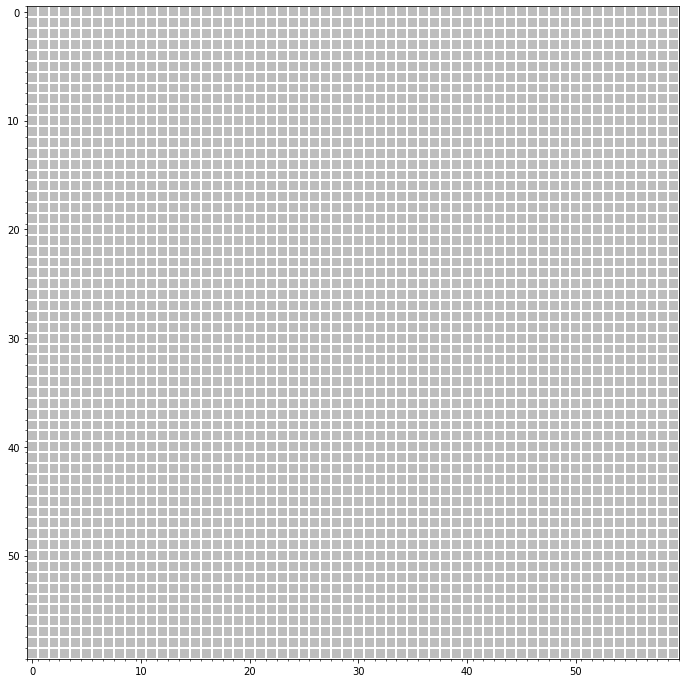

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# fig, axs = plt.subplots(figsize=(30,15), ncols=2)

grid = np.zeros((60,60))
# grid[44, 44] = 1


plt.imshow(grid, cmap='Greys', vmin=-0.6, vmax=1.)

# Minor ticks
ax.set_xticks(np.arange(-.5, 60, 1), minor=True)
ax.set_yticks(np.arange(-.5, 60, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# plt.axis('off')
plt.savefig('gridlargeempty.png', bbox_inches='tight', pad_inches = 0)

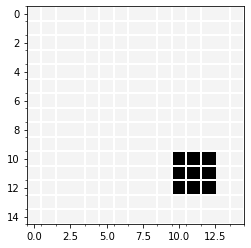

In [96]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca()
# fig, axs = plt.subplots(figsize=(30,15), ncols=2)

grid = np.zeros((15,15))
grid[10, 10] = 1
grid[10, 11] = 1
grid[10, 12] = 1
grid[11, 10] = 1
grid[11, 11] = 1
grid[11, 12] = 1
grid[12, 10] = 1
grid[12, 11] = 1
grid[12, 12] = 1


plt.imshow(grid, cmap='Greys', vmin=-0.1)

# Minor ticks
ax.set_xticks(np.arange(-.5, 15, 1), minor=True)
ax.set_yticks(np.arange(-.5, 15, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.savefig('gridsmall.png', bbox_inches='tight', pad_inches = 0)
# plt.axis('off')

In [3]:
sort_y = load_data('sort_y')
facts = load_data('facts')


In [4]:
sort_y.index

Int64Index([266956001,  41368006,   9904008,  67531005,  29271008,  19346006,
             72855002, 266413002,  71851009,  35964007,
            ...
             86266009, 204192005,    313005,  43216008,  39302008,  64479007,
            223176004,  27272007,  14582003,   1145003],
           dtype='int64', name='snomed_reaction', length=3481)

In [7]:
f = facts[['snomed_reaction', 'case_id']].drop_duplicates()
f = f[np.isin(f['snomed_reaction'], sort_y.index)]
f

snomed_reaction   case_id
0               423590009   3041652
3               386661006   3299018
4               247471006   3299018
5               278528006   3299018
12              386211005   3389764
...                   ...       ...
15329514         43364001  17272032
15329515        422587007  17273229
15329516         43364001  17273230
15329517        238810007  17273230
15329518        419099009  17273255

[8197691 rows x 2 columns]

In [9]:
counts = f.groupby('snomed_reaction').count()


In [16]:
np.quantile(counts.values, 0.990)

42236.19999999998

In [22]:
drug_counts = facts[['tox_drug_id','case_id']].drop_duplicates().groupby('tox_drug_id').count()

In [28]:
drug_counts[(drug_counts == 103957).values]

case_id
tox_drug_id         
1832          103957

In [34]:
a = facts[['tox_drug_id', 'case_id']].drop_duplicates()
b = a[a['tox_drug_id'] == 1832]
c = a[a['tox_drug_id'] != 1832]
c = c['case_id'].values.tolist()
b = b['case_id'].values.tolist()
b = set(b).difference(set(c))
b = np.array(list(b))

f = facts[['snomed_reaction', 'case_id']].drop_duplicates()
f = f[np.isin(f['snomed_reaction'], sort_y.index)]
f = f[np.isin(f['case_id'], b)]
f


snomed_reaction   case_id
15078            21522001   6119359
15079            81546003   6119359
15080            11381005   6119359
15081            11817007   6119359
15082            48694002   6119359
...                   ...       ...
15329132        271737000  17257480
15329133        267038008  17257480
15329194         45007003  17258205
15329201        419099009  17258468
15329446        128053003  17266452

[106354 rows x 2 columns]

In [54]:
counts = f.groupby('snomed_reaction').count()
np.quantile(counts.values, 0.4)

3.0

In [57]:
len(counts)/(59*59)

0.5314564780235564

In [58]:
doubles = load_data('doubles')


In [63]:
doubles.groupby('tox_drug_id').count().sort_values(by='case_id')

case_id  snomed_reaction
tox_drug_id                          
1770               1                1
1323               1                1
1331               1                1
1348               1                1
1362               1                1
...              ...              ...
256            29519            29519
36             29969            29969
3384           32187            32187
1958           32725            32725
2075           33831            33831

[1984 rows x 2 columns]

In [66]:
doubles[np.isin(doubles['tox_drug_id'],[2075, 1958])][['snomed_reaction','case_id']].drop_duplicates()

snomed_reaction   case_id
1245            416010008   4000818
3515            416010008   5657202
3516             22173004   5657202
3579             89369001   5661303
5168             21522001   5768359
...                   ...       ...
15327615         22325002  17221278
15327616         71922006  17221278
15327617         51476001  17221278
15327670          7973008  17221292
15329023        233604007  17256113

[66456 rows x 2 columns]

In [181]:
g = facts.value_counts('tox_drug_id')
g = g.rename('support')
g

tox_drug_id
1869    238559
256     200500
1832    195073
2075    188775
36      153480
         ...  
997          1
2069         1
2545         1
2126         1
1004         1
Name: support, Length: 2530, dtype: int64

In [182]:
# d = 1813

g2 = pd.Series(facts.groupby('tox_drug_id')['snomed_reaction'].nunique())
g2 = g2.rename('AEs')
g2
# facts[facts['tox_drug_id'] == d]['snomed_reaction'].nunique()

tox_drug_id
1         22
2        736
5         23
10       142
11        20
        ... 
3618      11
3619    1005
3620    1505
3621     122
3622     483
Name: AEs, Length: 2530, dtype: int64

In [183]:
merged = pd.merge(g, g2, left_index=True, right_index=True)
merged

support   AEs
tox_drug_id               
1869          238559  3602
256           200500  3555
1832          195073  2672
2075          188775  3455
36            153480  3291
...              ...   ...
997                1     1
2069               1     1
2545               1     1
2126               1     1
1004               1     1

[2530 rows x 2 columns]

In [184]:
merged[merged['support'] > 60 * merged['AEs']]

support   AEs
tox_drug_id               
1869          238559  3602
1832          195073  2672
148           146425  2110
3246          140957  2233
1864          122459  1756
58            109038   387
225           104531  1687
2927           80694   897
1707             300     3

In [185]:
merged[np.logical_and(merged['support'] > 5000, merged['AEs'] < 400)]

support  AEs
tox_drug_id              
58            109038  387
2772            6506  202
3158            5933  182
1194            5312  384
1659            5149  394

In [186]:
merged.loc[861]

support    15784
AEs         1307
Name: 861, dtype: int64

In [189]:
np.mean(merged['AEs'].values)

412.25256916996045

In [190]:
# 2927, 148, 1864, 225
d = 1869
drugs = load_data('drugs')
drugs[drugs['id'] == d]

id           name  pubchem_compound_id
1868  1869  levothyroxine                 5819

In [191]:
preds

snomed_reaction
3253007      0.018796
11381005     0.103521
13277001     0.009226
13582007     0.013335
16386004     0.355259
23006000     0.003612
43116000     0.003366
45177002     0.010430
46742003     0.001079
49765009     0.018646
53181008     0.001157
55680006     0.078665
59172008     0.001589
64144002     0.002349
74776002     0.001060
80910005     0.004891
86708008     0.009500
91374005     0.001176
93448009     0.001215
95321009     0.015102
95324001     0.001867
95900002     0.002531
102599008    0.005016
108365000    0.001099
116223007    0.002068
126485001    0.026820
200835003    0.003060
201307004    0.009669
212400009    0.001333
247434009    0.001060
247441003    0.320600
271756005    0.032290
271757001    0.040043
271767006    0.186501
271807003    0.141638
278528006    0.021258
279333002    0.102342
281647001    0.002068
300886007    0.017406
301364008    0.097934
359610006    0.002653
366667001    0.015272
367466007    0.185032
371704001    0.003080
373932008    0.0

In [230]:
for d, w in zip([58, 861, 1869], [500, 520, 475]):
    T.attr_label()
    preds = get_predictions(d)
    preds = preds[preds.values >= np.quantile(preds, 1 - 15/len(preds))]
    df = preds.reset_index()
    df['snomed_reaction'] = [label_name(T.nodes[int(n)].label) if int(n) in T.nodes.keys() else n for n in df['snomed_reaction']]
    fig = px.bar(df,
            x='frequency',
            y='snomed_reaction',
            orientation='h',
            labels={
                     "snomed_reaction": "",
                     "frequency": "Predicted frequency",
                 })

    fig.update_layout(
    #     autosize=False,
        width=w,
        height=340,
    #     showlegend=False,
        margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    yaxis={'categoryorder':'total ascending'},
    # xaxis={'visible':False}
    )
    fig.write_image(f'barchart_base_predictions_{d}.pdf')
    fig.show()

In [193]:
T.attr_label()
preds = get_predictions(d, predictor='frequency')
preds = preds[preds.values > np.quantile(preds, 0.995)]
df = preds.reset_index()
df['snomed_reaction'] = [T.nodes[int(n)].label if int(n) in T.nodes.keys() else n for n in df['snomed_reaction']]
fig = px.bar(df,
        x='frequency',
        y='snomed_reaction',
        orientation='h')

fig.update_layout(
#     autosize=False,
    width=800,
    height=200,
#     showlegend=False,
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
yaxis={'categoryorder':'total ascending'},
# xaxis={'visible':False}
)
fig.write_image('barchart_base_predictions.pdf')
fig.show()

In [194]:
preds = get_predictions(d, predictor='frequency')
len(preds[preds>=0.0001])

1439

In [195]:
isinstance(preds.loc[563001], float)

True

In [196]:
# test candidates
preds = get_predictions(861, predictor='ci_low')
T_copy = T.copy()
T_copy.set_predictions(preds, aggregate='sum+unique', copy_subgraph=False)
print(len(candidates(T_copy)))

7 predictions not found


185


In [ ]:
sum(preds>0.)

# Comparing summaries

In [212]:
cov = CoverageDistance(T, func=lambda x: np.power(x, 0.5), only_leafs=False)

Initialization complete.


In [214]:
lists = []
for d in [58, 861, 1869]:
    preds = get_predictions(d, predictor='ci_low')#'ci_low') #861

    T.reset_pred()
    T.set_predictions(preds, aggregate='sum+unique', copy_subgraph=False)
    T_P = T
    
    summary_nodes = cov.greedy(T, 5)
    lists.append([n.label for n in summary_nodes])
    
    theirs = greedy_plus(T, 5)
    lists.append([n.label for n in theirs])

12 predictions not found
7 predictions not found
47 predictions not found


In [224]:
for j in [slice(0,2), slice(2,4), slice(4,6)]:
    for i in range(5):
        row = [label_name(l[i]) for l in lists[j]]
        row = ' & '.join(row)
        row = f"{row} \\\\"
        print(row)
    print()
        

Dry skin  & Skin structure  \\
Erythema  & Erythema  \\
Peeling of skin  & Dry skin  \\
Skin irritation  & Peeling of skin  \\
Eruption of skin  & Skin irritation  \\

Febrile neutropenia  & Clinical finding  \\
Myelophthisis  & Febrile neutropenia  \\
Fever  & Myelophthisis  \\
Decreased blood leukocyte number  & Fever  \\
Sepsis  & Neutropenia  \\

Malaise and fatigue  & Clinical finding  \\
Headache disorder  & Malaise and fatigue  \\
Insomnia  & Headache disorder  \\
Pain  & Insomnia  \\
Spasm  & Weight increased  \\



In [238]:
preds = get_predictions(58, predictor='ci_low')#'ci_low') #861

T.reset_pred()
T.set_predictions(preds, aggregate='sum+unique', copy_subgraph=False)
T_P = T


# draw_nodes = nodes
# draw_nodes = representative(T_P, 50, score=lambda w, d: w * 1/(1.9**d))
# draw_nodes = representative(T_P, N, score=lambda w, d: w * 1/(1+d))
# draw_nodes = greedy_plus(T_P, 5)
# cov = CoverageDistance(T, func=lambda x : np.power(x, 1.5), only_leafs=True)
# cov = CoverageDistance(T, func=lambda x: 1 + np.log(x), only_leafs=False)
# cov = CoverageDistance(T, func=lambda x: 1 + np.log(x), only_leafs=True)
# draw_nodes = cov.greedy(T_P, 5)
# draw_nodes = representative(T_P, 30)
# T_P.aggregate_pred('sum+unique')

# summary = T_P.summary_graph(draw_nodes, copy_pred=True, single_source=False, discard_singles=False)

# for n in summary.nodes.values():
#     n.pred = n.pred_agg


12 predictions not found


In [239]:
ours = cov.greedy(T, 10)
[(n.label, len(n.preds), n.pred_agg) for n in ours]

[('Dry skin (finding)', 1, 0.3552588574982062),
 ('Erythema (finding)', 1, 0.3205999811200163),
 ('Peeling of skin (finding)', 1, 0.1865009011389757),
 ('Skin irritation (finding)', 1, 0.1850318606927185),
 ('Eruption of skin (disorder)', 6, 0.2181197657826772)]

In [240]:
print([n.name for n in ours])

[16386004, 247441003, 271767006, 367466007, 271807003]


In [190]:
theirs = greedy_plus(T, 5)
[(n.label, len(n.preds), n.pred_agg) for n in theirs]

KeyboardInterrupt: 

In [195]:
sum(preds > 0.0001)
# pred

87

In [77]:
ours_sum = T.summary_graph(ours, fake_root=True, copy_pred=False)
ours_sum.attr_label()

In [78]:
ours_sum.root

C:5 NODE: fake root

In [79]:
ours_sum.root.children[0].children

[]

In [80]:
theirs_sum = T.summary_graph(theirs, fake_root=True, copy_pred=False)
theirs_sum.attr_label()

In [81]:
theirs_sum.root.children[0].children

[C:0 NODE: Diarrhea (finding),
 C:0 NODE: Dead (finding),
 C:0 NODE: Malaise and fatigue (finding),
 C:0 NODE: Pneumonia (disorder)]

In [82]:
sub = T.set_predictions(preds, aggregate='sum+unique', copy_subgraph=True)
sub.attr_label()

Predictions not reset. Consider calling reset_pred
43 predictions not found


121789
computed pos
computed pos
G has no nodes.
computed pos


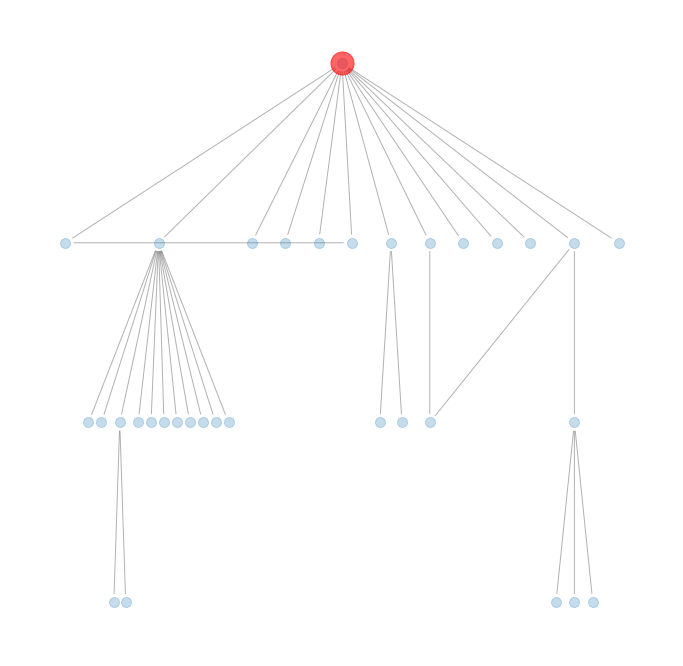

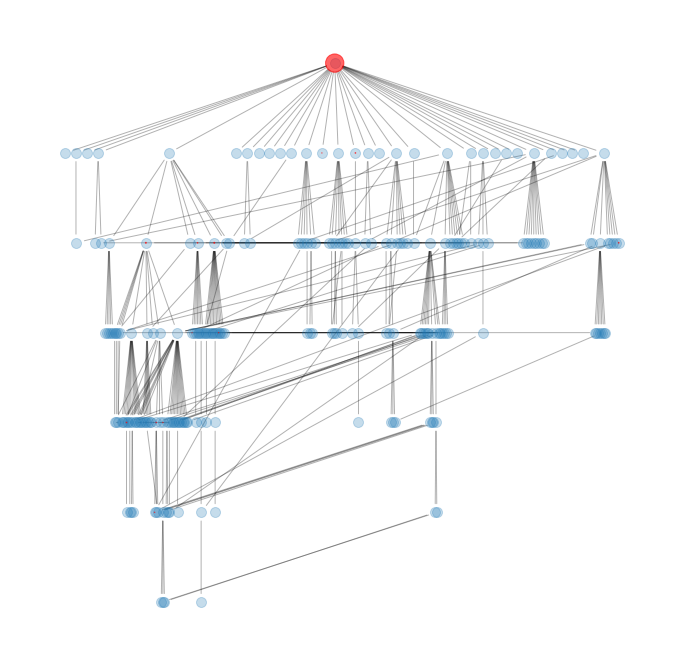

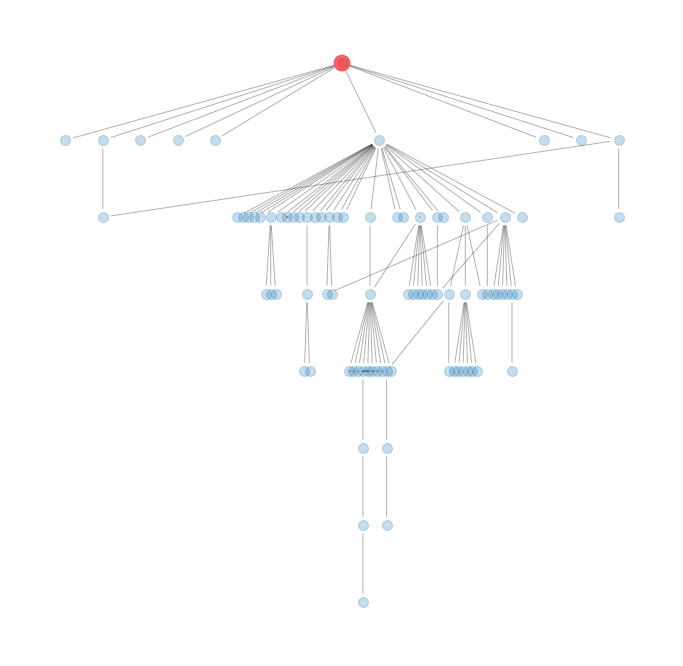

In [83]:
from networkx import NetworkXPointlessConcept
for i in range(5):
    try:
        r = T.nodes[theirs[i].name] #419188005]
        desc = [n for n in r.descendants()]
        desc = sorted(desc, key=lambda x: x.depth)
        if len(desc) > 30000:
            print(len(desc))
            continue

        c = 9
        def l(t):
        #     t = label_name(t)[:-1]
            split = t.split(' ')
            ress = []
            res = ''
            for item in split:
                res += ' ' + item
                if len(res) > 10:
                    ress.append(res[1:])
                    res = ''
            if len(res) > 0:
                ress.append(res[1:])
            joined = '\n'.join(ress)
            return joined

        edges = []
        edges_to_add_later = []
        add_nodes = set()
        for i, node in enumerate(desc):
            if len(add_nodes) == 0: # root
                add_nodes.add(node)
            if node in add_nodes:
                for child in node.children:
                    if child not in add_nodes:
                        add_nodes.add(child)
                        edges.append((node.name, child.name))
                    else:
                        edges_to_add_later.append((node.name, child.name))

        g = nx.DiGraph()
        g.add_edges_from(edges)

        assert nx.is_tree(g)

        pos = hierarchy_pos(g)

        g.add_edges_from(edges_to_add_later)

        selected_labels = {node.name: l(node.label) for node in desc}# if node.name in summary.nodes.keys()}

        print("computed pos")
        fig = plt.figure(figsize=(12,12))
        ax = fig.gca()
        # fig, axs = plt.subplots(figsize=(30,15), ncols=2)

        nx.draw_networkx_edges(g, pos, ax=ax,
                               arrowstyle='-',
                               alpha=0.3)
        nx.draw_networkx_nodes(g, pos, ax=ax, alpha=0.26, node_size=100, cmap='viridis',
        #                        node_color=[coloring[n] for n in list(g)]
                              )
        # nx.draw_networkx(g, pos, ax=axs[1], nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
        # nx.draw_networkx_labels(g, pos, ax=axs[1], labels=selected_labels);
        # fig


        nx.draw_networkx_nodes(g, pos, ax=ax,
                               nodelist=[n.name for n in desc if (n.pred is not None and n.pred != 0)],
                               alpha=0.6,
                               node_size=[n.pred * 5000 for n in desc  if (n.pred is not None and n.pred != 0)],
                               cmap='viridis',
                               node_color="red")

        plt.axis('off')
        # plt.savefig('full_tree_and_preds.pdf', bbox_inches='tight', pad_inches = 0)
    except NetworkXPointlessConcept as e:
        print(e)

In [ ]:
summary.attr_label()

In [ ]:
nodes = list(summary.nodes.values())
ws = [T_P.nodes[n.name].pred_agg for n in nodes]
order = np.argsort(ws)

fig = go.Figure(go.Bar(
        x=[nodes[o].pred_agg for o in order],
        y=[label_name(nodes[o].label) for o in order],
        orientation='h',
        name='frequency'))

fig.update_layout(
    autosize=False,
    width=800,
    height=290,
    showlegend=False,
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
yaxis={'categoryorder':'total ascending'},
xaxis={'visible':False})
fig.write_image('barchart.pdf')
fig.show()


In [ ]:
T_P.attr_label()


In [ ]:
nodes_ordered = [nodes[o] for o in order]

data = pd.DataFrame({
    "term": [t.label for t in nodes_ordered for l in T_P.nodes[t.name].preds],
    "leafterm": [l.name for t in nodes_ordered for l in T_P.nodes[t.name].preds],
    "pred": [l.pred for t in nodes_ordered for l in T_P.nodes[t.name].preds],
})

fig = px.bar(data, x="pred", y="term", color="leafterm", orientation="h",
    color_discrete_sequence=[get_c(coloring[l.name]) for t in nodes_ordered for l in T_P.nodes[t.name].preds],
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(
    autosize=False,
    width=600,
    height=290,
    showlegend=False,
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    coloraxis_showscale=False,
yaxis={'categoryorder':'total ascending', 'visible':False},
xaxis={'visible':False})
fig.update_traces(marker_line_width=0.)
fig.write_image('stacked_barchart.pdf')
fig.show()

In [ ]:
fig

# Basic visualization

In [3]:
preds = get_predictions(861, predictor='ci_low')

T.reset_pred()
T_P = T.set_predictions(preds, aggregate='sum+unique', copy_subgraph=True)

cov = CoverageDistance(T, func=np.sqrt, only_leafs=True)

draw_nodes = cov.greedy(T_P, 5)

summary = T_P.summary_graph(draw_nodes, copy_pred=True, single_source=False, discard_singles=False)

for n in summary.nodes.values():
    n.pred = n.pred_agg


coloring = dict()
for i, node in enumerate(T.traverse(raise_on_visited=False, yield_visited=False, yield_first_visit=True)):
    coloring[node.name] = i / (len(T) - 1)

7 predictions not found


Initialization complete.


In [ ]:
tree = T_P

c = 9
def l(t):
#     t = label_name(t)[:-1]
    split = t.split(' ')
    ress = []
    res = ''
    for item in split:
        res += ' ' + item
        if len(res) > 10:
            ress.append(res[1:])
            res = ''
    if len(res) > 0:
        ress.append(res[1:])
    joined = '\n'.join(ress)
    return joined

tree.attr_label()

edges = []
edges_to_add_later = []
add_nodes = set()
for i, node in enumerate(tree.traverse(raise_on_visited=False, yield_visited=False, yield_first_visit=True)):
    if len(add_nodes) == 0: # root
        add_nodes.add(node)
    if node in add_nodes:
        for child in node.children:
            if child not in add_nodes:
                add_nodes.add(child)
                edges.append((node.name, child.name))
            else:
                edges_to_add_later.append((node.name, child.name))

g = nx.DiGraph()
g.add_edges_from(edges)

assert nx.is_tree(g)

pos = hierarchy_pos(g)

g.add_edges_from(edges_to_add_later)

selected_labels = {node.name: l(node.label) for node in tree.nodes.values() if node.name in summary.nodes.keys()}

print("computed pos")
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# fig, axs = plt.subplots(figsize=(30,15), ncols=2)

# nx.draw_networkx_edges(g, pos, ax=ax, arrowstyle='-', alpha=0.1)
nx.draw_networkx_nodes(g, pos, ax=ax, alpha=0.26, node_size=100, cmap='viridis', node_color=[coloring[n] for n in list(g)])
# nx.draw_networkx(g, pos, ax=axs[1], nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
# nx.draw_networkx_labels(g, pos, ax=axs[1], labels=selected_labels);
# fig


nx.draw_networkx_nodes(g, pos, ax=ax, nodelist=[n.name for n in tree.nodes.values() if (n.pred is not None and n.pred != 0)], alpha=0.6, node_size=[n.pred * 5000 for n in tree.nodes.values()  if (n.pred is not None and n.pred != 0)], cmap='viridis', node_color="red")

plt.axis('off')
# plt.savefig('full_tree_and_preds.pdf', bbox_inches='tight', pad_inches = 0)


In [ ]:

### Additionally drawing summary nodes around the plot!

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# nx.draw_networkx_edges(g, pos, ax=ax, arrowstyle='-', alpha=0.03)
nx.draw_networkx_nodes(g, pos, ax=ax, alpha=0.26, node_size=100, cmap='viridis', node_color=[coloring[n] for n in list(g)])

mid = pos[409623005]
furthest = pos[404684003]

r = np.sqrt((mid[0] - furthest[0]) ** 2 + (mid[1] - furthest[1]) ** 2) * 1.4

ang_start = 3/4 * np.pi
ang_end = (2 + 1/4) * np.pi

diff = (ang_end - ang_start) / (len(selected_labels) - 1)

colors = [coloring[n] for n in selected_labels.keys()]
order = np.argsort(colors)
# order = [14, 18, 16, 13, 12,  3,  4, 10, 0, 17,  9, 11,  7,  2, 5,  6, 1, 15,  8, 19] # of their method
# order = [5, 12, 17, 14, 11, 10, 3, 13,  4, 19, 15, 9, 7, 16,  0,  2,  6,  1,  8, 18] # of ours with log
# order = [5, 11, 16, 13, 19, 10,  9, 4, 12,  18, 14, 8, 7, 15, 0,  2, 3, 6,  1, 17] # of ours with sqrt

label_pos = dict()
for i, o in enumerate(order):
    name, label = list(selected_labels.items())[o]
    ang = ang_start + diff * i
    loc = (mid[0] - np.cos(ang), mid[1] + 1.9 * np.sin(ang) - 0.4)
    label_pos[name] = loc



for name, label in selected_labels.items():
    arrow = mpl.patches.FancyArrowPatch(posA=label_pos[name], posB=pos[name], alpha=.6, arrowstyle='-|>', color="black", mutation_scale=10, linewidth=2,)
    ax.add_patch(arrow)
    
nx.draw_networkx(g, label_pos, ax=ax, nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
nx.draw_networkx_labels(g, label_pos, ax=ax, labels=selected_labels);
ax.set_xlim((-0.7, 1.71))
plt.axis('off')
# plt.savefig('20_summary_our_method_log.pdf', bbox_inches='tight', pad_inches = 0)


In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
for name, label in selected_labels.items():
    arrow = mpl.patches.FancyArrowPatch(posA=label_pos[name], posB=pos[name], alpha=.4, arrowstyle='-|>', color="black", mutation_scale=10, linewidth=3,)
    ax.add_patch(arrow)
    
nx.draw_networkx(g, label_pos, ax=ax, nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
nx.draw_networkx_labels(g, label_pos, ax=ax, labels=selected_labels);

ax.set_xlim((-0.7, 1.71))


In [8]:
from visualize_events.data import load_data
facts_drugs = load_data('drugs')
sort_y = load_data('sort_y')


In [11]:
sort_y

X          Y  bin_x  bin_y
snomed_reaction                                   
266956001       -8.623839  15.044003      1      1
41368006        -8.637211  15.048419      1      2
9904008         -8.637134  15.054017      1      3
67531005        -8.611483  15.057714      1      4
29271008        -8.675699  15.658179      1      5
...                   ...        ...    ...    ...
64479007        -0.395068  17.525928     59     55
223176004       -0.380260  17.530262     59     56
27272007        -0.377414  17.532260     59     57
14582003        -0.379296  17.532660     59     58
1145003         -0.373587  17.539253     59     59

[3481 rows x 4 columns]

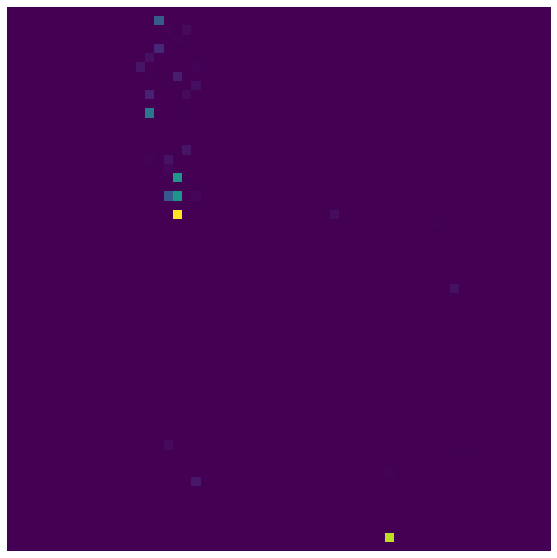

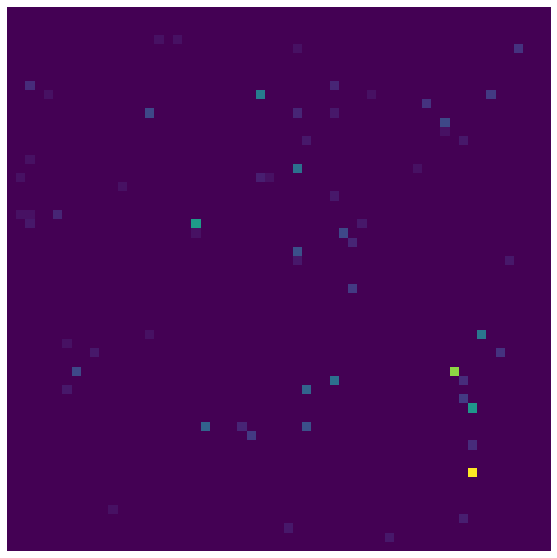

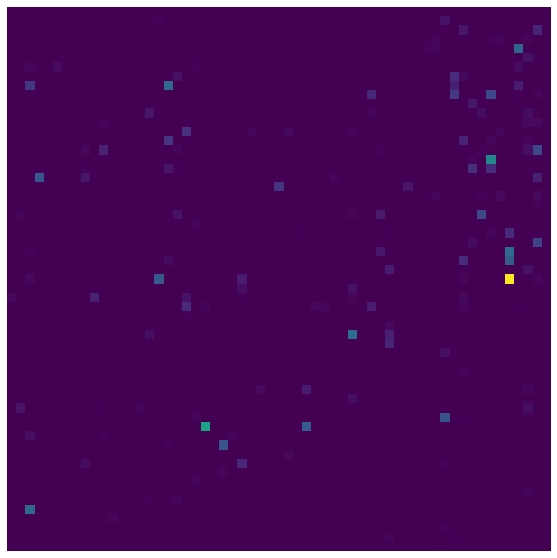

In [18]:
for d in [58, 861, 1869]:
    preds = get_predictions(d, predictor='ci_low')

    drug_freq = pd.merge(sort_y.reset_index().astype(str), preds.reset_index().astype(str), how = 'left', on = 'snomed_reaction')
    drug_freq['freq'] = drug_freq['ci_low'].astype(float).fillna(0)

    def load_cnninput1(df):
        t = df.astype({'bin_x': int, 'bin_y': int, 'freq': float})
        pivot_df = t.pivot_table(index= 'bin_y', columns ='bin_x', values = 'freq',fill_value=0).rename_axis(None).to_numpy()
        pivot_df = np.pad(pivot_df, [(0, 1), (0, 1)], mode='constant') #from 59*59 to a 60*60 dimension by adding a column with 0s at the end and a row with 0's below

        X = np.array(pivot_df).reshape(59,59)
        #reshape input for CNN. The input is 60*60 of 100 samples

        return X

    X = load_cnninput1(drug_freq)
    X

    fig = plt.figure(figsize = (10,10))
    plt.imshow(X, vmin=0)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.savefig(f'original_{d}_new_layout.pdf', bbox_inches='tight', pad_inches = 0)

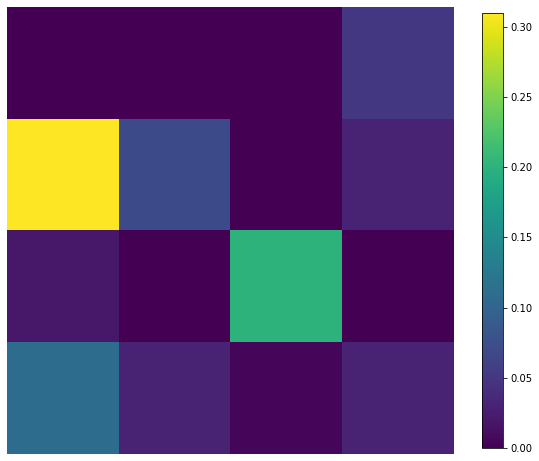

In [213]:
arr = np.array([
    0.0, 0.001, 0.0, 0.05,
    0.31, 0.07, 0.0, 0.03,
    0.02, 0.001, 0.2, 0.001,
    0.11, 0.03, 0.006, 0.03,
]).reshape(4, 4)
fig = plt.figure(figsize = (10,10))
pos = plt.imshow(arr)#, vmin=0, vmax=1)
fig.colorbar(pos, ax=plt.gca(), shrink=0.8)
# plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig(f'example_drug_A.pdf', bbox_inches='tight', pad_inches = 0)

# Design 1

In [200]:
input_data = load_data('input_data')
all_mentioned_AE = input_data.index.values
all_mentioned_AE = all_mentioned_AE[np.isin(all_mentioned_AE, list(T.nodes.keys()))]
# input_data = input_data.loc[all_mentioned_AE]
# input_data

In [201]:
tsne = TSNE(metric="euclidean",
            perplexity=30,
            early_exaggeration=10)
emb = tsne.fit_transform(input_data.values)

print("Created t-SNE")

scaler = MinMaxScaler(feature_range=(-0.95,0.95))
emb = scaler.fit_transform(emb)

C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Created t-SNE


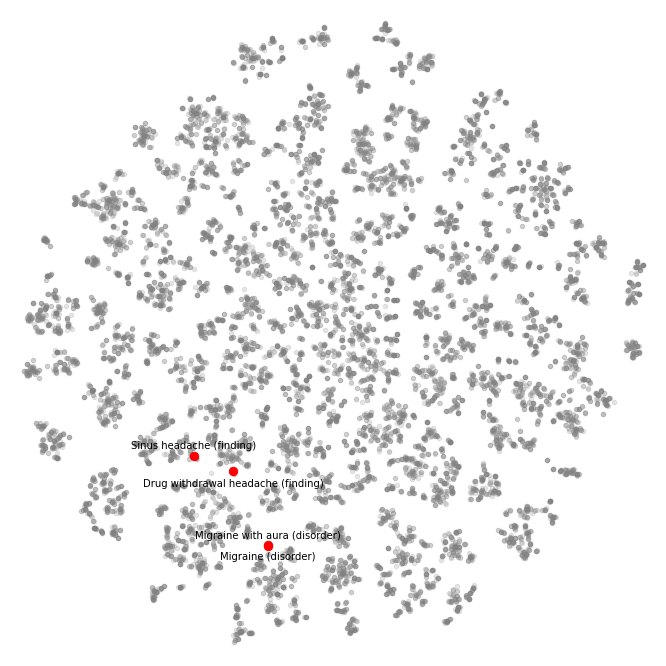

In [211]:

plt.figure(figsize=(12,12))
ax = plt.gca()

head_stuff = [4969004, 43242008, 37796009, 4473006]
headstuff = {n: T.nodes[n].label for n in head_stuff}
head_col = {n: i/5 for i,n in enumerate(head_stuff)}

scatter = plt.scatter(entire_embedding[:, 0], entire_embedding[:, 1], s=20, alpha=0.2, c="gray")
for j, n in enumerate(head_stuff):
#     i = input_data.index.tolist().index(n)
    i = np.load('all_mentioned_AE.npy').tolist().index(n)
    plt.scatter(entire_embedding[i, 0], entire_embedding[i, 1], s=70, alpha=1.,
        c="red",#[head_col[n]],
#             label=[category_map[name] for name in all_mentioned_AE],
        cmap='nipy_spectral', vmin=0, vmax=1
       )
    plt.gca().text(entire_embedding[i, 0], entire_embedding[i,1]-.02 + (j == 3 or j == 0)*0.07, headstuff[n], verticalalignment='top', horizontalalignment='center')#, size='smaller')

# handles, labels = plt.gca().legend_elements(prop="colors", alpha=1.0)
# ax.legend(handles, list(headstuff.values()) + ["Other"], loc="upper left", title="Colors")

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.savefig('random_terms_far_away_our_emb.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()

In [170]:
{n: T.nodes.get(n, None) for n in input_data.index}

{216004: P:3, C:2 NODE: Delusion of persecution (finding),
 313005: P:4, C:0 NODE: Déjà vu (finding),
 355001: P:3, C:0 NODE: Hemorrhagic shock (disorder),
 368009: P:3, C:28 NODE: Heart valve disorder (disorder),
 407000: P:6, C:2 NODE: Congenital hepatomegaly (disorder),
 563001: P:4, C:42 NODE: Nystagmus (disorder),
 758002: P:5, C:1 NODE: Cyst of uterus (disorder),
 792004: P:5, C:5 NODE: Jakob-Creutzfeldt disease (disorder),
 815008: P:4, C:12 NODE: Episcleritis (disorder),
 932006: P:5, C:0 NODE: Flat affect (finding),
 991002: P:7, C:0 NODE: Wide QRS complex (finding),
 1023001: P:4, C:17 NODE: Apnea (finding),
 1145003: P:4, C:5 NODE: Developmental speech disorder (disorder),
 1214006: P:3, C:18 NODE: Infection caused by Strongyloides (disorder),
 1335005: P:5, C:0 NODE: Induratio penis plastica (disorder),
 1345007: P:2, C:0 NODE: Hang nail (disorder),
 1376001: P:1, C:2 NODE: Obsessive compulsive personality disorder (disorder),
 1384002: P:3, C:1 NODE: Diffuse cholesteatosis

In [ ]:

4969004
43242008
37796009
4473006
43954004

In [160]:
entire_embedding = np.load('entire_embedding.npy')

In [161]:
CF = T.nodes[404684003]
disease = T.nodes[64572001]
T.add_parent_store()

In [162]:
facts = load_data('facts')

In [163]:
all_mentioned_AE = facts['snomed_reaction'].unique()
all_mentioned_AE = [name for name in all_mentioned_AE if name in T.nodes]

# categories = set(n.name for n in CF.children)
# categories.update(set(n.name for n in disease.children))
# categories.remove(disease.name)
# category_counts = dict()
# no_cat_count = 0

if True: # Also use ancestors!
    all_mentioned_AE_and_ancestors = set()
    for name in all_mentioned_AE:
        ancestors = set(anc.name for anc in T.nodes[name].ancestors())
        all_mentioned_AE_and_ancestors.update(ancestors)
        
#         found_category = categories.intersection(ancestors)

#         if len(found_category) == 0:
#             no_cat_count += 1
            
#         for cat in found_category:
#             c = category_counts.get(cat, 0)
#             category_counts[cat] = c + 1

    all_mentioned_AE = list(all_mentioned_AE_and_ancestors)

assert all(all_mentioned_AE == np.load('all_mentioned_AE.npy'))


print(len(all_mentioned_AE))
# print(f"{no_cat_count} have no category")


17479


In [164]:

category_map = dict()

# categories associated with a finding
# categories = [386617003, 415531008, 384821006, 106048009, 106063007, 118235002, 232208008, 106077005, 441742003, 106048009]


# categories associated with a body structure
categories =[
    127948008 ,
    127951001 ,
    384763002 ,
    371398005 ,
    123851003 ,
#    251007 ,
    85562004 ,
    22943007 ,
]

# categories = [k for k,v in category_counts.items() if v >= 200]

# categories = [16386004, 247441003, 271767006, 367466007, 271807003]


N_categories = len(categories)
print(f"Chose {N_categories} categories")
unmapped_AEs = set(all_mentioned_AE).difference(categories)

for cat, cat_name in enumerate(categories):
    category_map[cat_name] = cat

for cat, cat_name in enumerate(categories[::-1]):
    cat = len(categories) - 1 - cat
    to_remove = set()
    for AE in unmapped_AEs:
        if AE == cat_name or AE not in categories:
            ancs = set(anc.name for anc in T.nodes[AE].ancestors())
            if cat_name in ancs:
                category_map[AE] = cat
                to_remove.add(AE)
    unmapped_AEs = unmapped_AEs.difference(to_remove)
    
categories.append("Other")
N_categories += 1
for name in unmapped_AEs:
# for name in (set(T.nodes.keys()).difference(set(all_mentioned_AE)).union(unmapped_AEs)):
    assert category_map.get(name, None) is None
    category_map[name] = len(categories) - 1
    
print("Creating category coloring")

coloring2 = {name : category_map[name] / (N_categories - 1) for name in all_mentioned_AE}
coloring3 = {name : category_map[name] for name in all_mentioned_AE}

Chose 7 categories
Creating category coloring


In [9]:
xs, ys, snomes = [], [], []
for name in input_data.index:
    if name in all_mentioned_AE:
        i = all_mentioned_AE.index(name)
        x, y = entire_embedding[i].tolist()
        xs.append(x)
        ys.append(y)
        snomes.append(name)
emb = pd.DataFrame({'X':xs, 'Y':ys}, index=snomes)
emb.index.name = 'snomed_reaction'


58


C:\Users\SEANMC~1\AppData\Local\Temp/ipykernel_10504/2549521301.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['test'] = x
C:\Users\SEANMC~1\AppData\Local\Temp/ipykernel_10504/2549521301.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['test'] = range(1,dim +1)


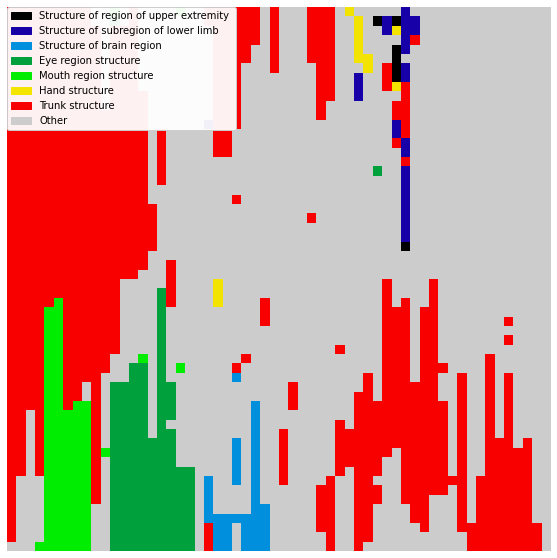

In [10]:
# sort_y = load_data('sort_y')

## Functions to split  x/y  coordination in equal sizes to create 2Dgrid plot
#split data into equal sizes of dimension of 2D grid
def chunker(seq, size):
        for pos in range(0, len(seq), size):
            yield seq.iloc[pos:pos + size] 

# --- if using input_data   
# dim =59
# no_remove = len(input_data) - (dim*dim) #to be able to split data into equal sizes
# remove_index = input_data.T.sum().sort_values().index[:no_remove] #sum columns, remove low values
# clust_output = pd.DataFrame({'X':emb[:, 0], 'Y':emb[:, 1]}, index=input_data.index)
# clust_clean = clust_output.drop(remove_index, axis = 0)
# --- if using our embeddings
dim = int(np.floor(np.sqrt(len(emb))))
print(dim)
no_remove = len(emb) - (dim*dim)
remove_index = np.random.choice(emb.index, replace=False, size=no_remove) #sum columns, remove low values
clust_clean = emb.drop(remove_index, axis = 0)


assert len(input_data)
            
def y_bin(x):
    sort = x.sort_values('Y')
    chunk_size = dim
    x = 0
    dfs = []
    for i in chunker(x, chunk_size):
        x = x + 1
        i['test'] = x
        dfs.append(i['test'])
        return(dfs)    
    
sort_X = clust_clean.sort_values('X') #sort X values 

#split in equal amount of chunks
chunk_size = dim
x = 0
dfs = []
for i in chunker(sort_X, chunk_size):
    x = x + 1
    i['test'] = x
    dfs.append(i['test'])
    
sort_X['bin_x'] = pd.concat(dfs, axis=0)

sort_y = sort_X.sort_values(by=["bin_x", "Y"]) #sort Y values

#y values are defined inside of each X bin
df2 = []
for i in chunker(sort_y, chunk_size):
    i['test'] = range(1,dim +1)
    #print(i)
    df2.append(i['test'])
sort_y['bin_y'] = pd.concat(df2, axis=0)




preds = pd.DataFrame({'snomed_reaction':[name for name in sort_y.index], 'color':[coloring2.get(name, 1.0) for name in sort_y.index]})
drug_freq = pd.merge(sort_y.reset_index().astype(str), preds.reset_index().astype(str), how = 'left', on = 'snomed_reaction')
drug_freq['freq'] = drug_freq['color'].astype(float).fillna(0)

def load_cnninput1(df):
    t = df.astype({'bin_x': int, 'bin_y': int, 'freq': float})
    pivot_df = t.pivot_table(index= 'bin_y', columns ='bin_x', values = 'freq',fill_value=0).rename_axis(None).to_numpy()
#     pivot_df = np.pad(pivot_df, [(0, 60-di), (0, 1)], mode='constant') #from 59*59 to a 60*60 dimension by adding a column with 0s at the end and a row with 0's below

    X = np.array(pivot_df).reshape(dim, dim)
#     X = X[:-1, :]
#     X = X[:, :-1]
    
    #reshape input for CNN. The input is 60*60 of 100 samples

    return X

X = load_cnninput1(drug_freq)
X

fig = plt.figure(figsize = (10,10))
plt.imshow(X, vmin=0, vmax=1, cmap='nipy_spectral')
plt.gca().invert_yaxis()
plt.axis('off')
cmap = mpl.cm.get_cmap('nipy_spectral')
patches = [
    mpl.patches.Patch(color=cmap(i/(len(categories)-1)), label=label_name(T.nodes[cat].label)) for i, cat in enumerate(categories[:-1])] + [
    mpl.patches.Patch(color=cmap(1.), label="Other")
]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.00, 1-0.00), loc=2, borderaxespad=0., framealpha=0.95)

# plt.savefig(f'original_colors_region.pdf', bbox_inches='tight', pad_inches = 0)

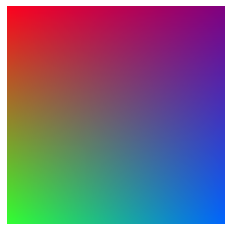

In [11]:
coloring = dict()
for i, node in enumerate(T.traverse(raise_on_visited=False, yield_visited=False, yield_first_visit=True)):
    coloring[node.name] = i / (len(T) - 1)
    
def interpolate_color_from_4corners(bl, br, tl, tr, nx, ny):
    new_colors = np.zeros((ny,nx,3)).astype(np.uint8)

    for irgb in np.arange(3):
        for iy in np.arange(ny):
            for ix in np.arange(nx):
                u0, v0 = ix / nx, iy / ny
                u1, v1 = 1 - u0, 1 - v0
                new_colors[iy, ix, irgb] = np.floor(0.5 + u1*v1*bl[irgb] 
                                                    + u0*v1*br[irgb] 
                                                    + u1*v0*tl[irgb] 
                                                    + u0*v0*tr[irgb])
    
    return new_colors

bl = np.array((50, 255, 50))
br = np.array((0,100,255))

tl = np.array((255,0,30))
tr = np.array((128, 0, 128)) 

im = np.zeros((2, 2, 3))
im[0, 0] = bl
im[0, 1] = br
im[1, 0] = tl
im[1, 1] = tr
im = im.astype(np.uint8)

nx, ny = 100, 100
colors_35 = interpolate_color_from_4corners(bl, br, tl, tr, nx, ny) / 255

coloring4 = {name: colors_35[int((emb[0]+1)*50//1), int((emb[1]+1)*50//1)]for name, emb in zip(all_mentioned_AE, entire_embedding)}

plt.imshow(colors_35, origin='lower')
plt.axis("off")
plt.savefig('color_gradient.pdf', bbox_inches='tight', pad_inches = 0)

In [8]:
assert False
# ------- INITIAL POINT ASSIGNMENT --------

anc_store_dict = T.get_ancestors()
anc_store = [anc_store_dict[name] for name in all_mentioned_AE]
print("Computed ancestor storage")

dist = np.zeros((len(all_mentioned_AE), len(all_mentioned_AE)))
for i, anc1 in enumerate(anc_store):
    for j, anc2 in enumerate(anc_store[i+1:], i+1):
#         common = anc1.intersection(anc2)
        diff = anc1.symmetric_difference(anc2)
        #d = 1/len(common)
#         d = 1/(sum(a.depth for a in common)+1)
        d = len(diff) / (len(anc1) + len(anc2))
        dist[i, j] = d
        dist[j, i] = d
dist = np.power(dist, 1.5)
print("Computed ancestor distances")

similarity = dist#[indx_P_nodes, :][:, indx_P_nodes]

tsne = TSNE(metric="precomputed",
            perplexity=30,
            early_exaggeration=10)
entire_embedding = tsne.fit_transform(similarity)

print("Created t-SNE")

scaler = MinMaxScaler(feature_range=(-0.95,0.95))
entire_embedding = scaler.fit_transform(entire_embedding)

AssertionError: 

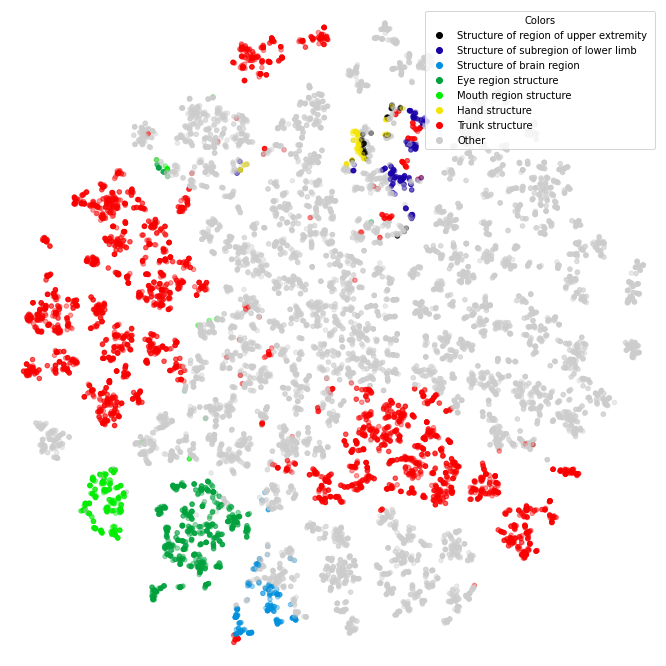

In [12]:
assert len(all_mentioned_AE) == len(entire_embedding)

plt.figure(figsize=(12,12))
ax = plt.gca()

scatter = plt.scatter(entire_embedding[:, 0], entire_embedding[:, 1], s=20, alpha=0.4,
            c=[coloring2[n] for n in all_mentioned_AE],
#             label=[category_map[name] for name in all_mentioned_AE],
            cmap='nipy_spectral'
           )
handles, labels = scatter.legend_elements(prop="colors", alpha=1.0)
ax.legend(handles, [label_name(T.nodes[cat].label) for cat in categories[:-1]] + ["Other"], loc="upper right", title="Colors")

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
# plt.savefig('embedding_all_AE_disease.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

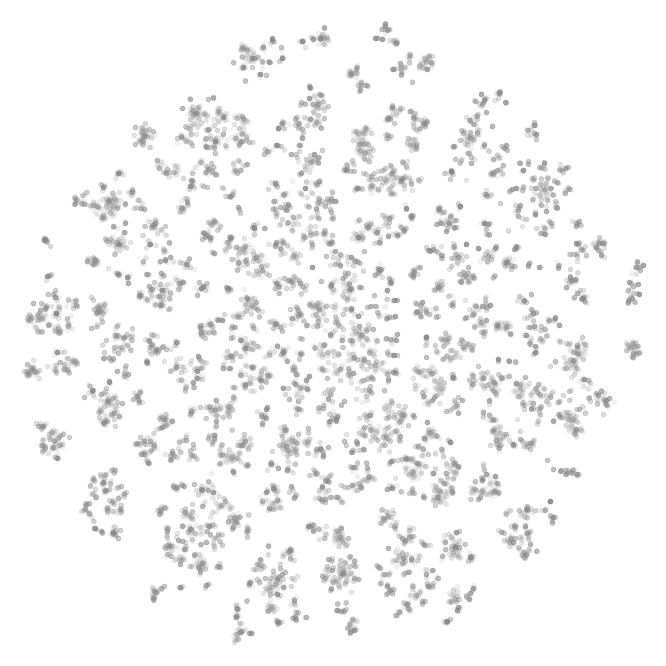

In [117]:
assert len(all_mentioned_AE) == len(entire_embedding)

plt.figure(figsize=(12,12))
ax = plt.gca()

m = max([preds.get(n, 0.) for n in all_mentioned_AE])

scatter = plt.scatter(entire_embedding[:, 0], entire_embedding[:, 1], s=20, alpha=0.5,
            c='grey',
#             label=[category_map[name] for name in all_mentioned_AE],
#             cmap='OrRd'
           )
# handles, labels = scatter.legend_elements(prop="colors", alpha=1.0)
# ax.legend(handles, [label_name(T.nodes[cat].label) for cat in categories[:-1]] + ["Other"], loc="upper right", title="Colors")

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
# plt.savefig('embedding_all_AE_disease.png', bbox_inches='tight', pad_inches = 0)
plt.savefig('embedding_grey.png', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

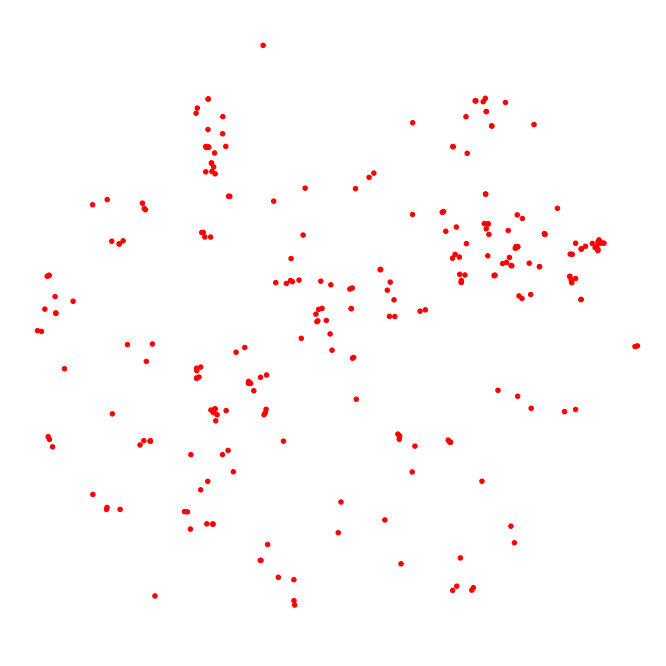

In [116]:
assert len(all_mentioned_AE) == len(entire_embedding)

plt.figure(figsize=(12,12))
ax = plt.gca()

m = max([preds.get(n, 0.) for n in all_mentioned_AE])

scatter = plt.scatter(entire_embedding[:, 0], entire_embedding[:, 1], s=20, alpha=[0.0 + 1. * (preds.get(n, 0.)>0) for n in all_mentioned_AE],
            c=["red" if (preds.get(n, 0.) > 0) else "white" for n in all_mentioned_AE],
#             label=[category_map[name] for name in all_mentioned_AE],
            cmap='YlOrRd'
           )
# handles, labels = scatter.legend_elements(prop="colors", alpha=1.0)
# ax.legend(handles, [label_name(T.nodes[cat].label) for cat in categories[:-1]] + ["Other"], loc="upper right", title="Colors")

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
# plt.savefig('embedding_all_AE_disease.pdf', bbox_inches='tight', pad_inches = 0)
plt.savefig('embedding_predictions.png', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

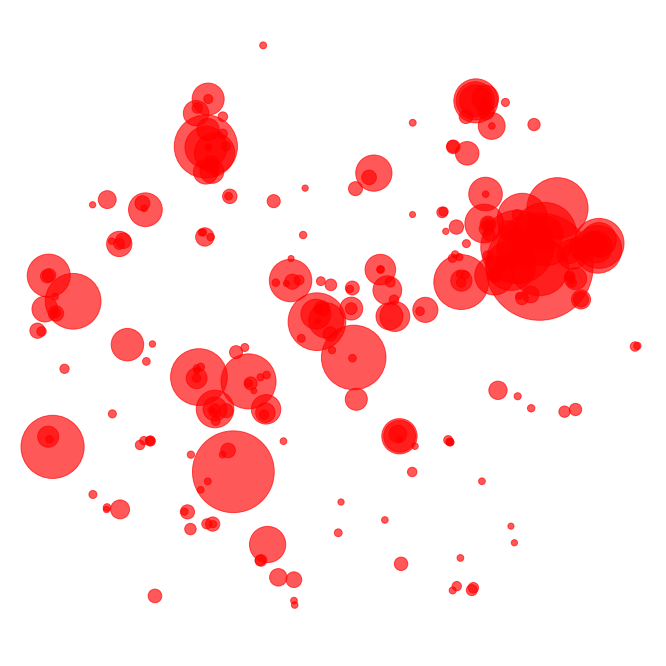

In [115]:
assert len(all_mentioned_AE) == len(entire_embedding)

plt.figure(figsize=(12,12))
ax = plt.gca()

m = max([preds.get(n, 0.) for n in all_mentioned_AE])

scatter = plt.scatter(entire_embedding[:, 0], entire_embedding[:, 1], alpha=[0. + 0.65 * (preds.get(n, 0.)>0) for n in all_mentioned_AE],
            c=["red" if (preds.get(n, 0.) > 0) else "white" for n in all_mentioned_AE],
#             label=[category_map[name] for name in all_mentioned_AE],
#             cmap='YlOrRd',
            s=[35000*preds.get(n, 0.) for n in all_mentioned_AE]
           )
# handles, labels = scatter.legend_elements(prop="colors", alpha=1.0)
# ax.legend(handles, [label_name(T.nodes[cat].label) for cat in categories[:-1]] + ["Other"], loc="upper right", title="Colors")

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
# plt.savefig('embedding_all_AE_disease.pdf', bbox_inches='tight', pad_inches = 0)
plt.savefig('embedding_scaled.png', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

In [26]:
np.unique([preds.get(n, 0.) for n in all_mentioned_AE])

array([0.00000000e+00, 7.05802425e-05, 9.97335944e-05, 1.30916907e-04,
       1.63679088e-04, 1.97713700e-04, 2.32801700e-04, 2.68780236e-04,
       3.05524398e-04, 3.42935926e-04, 3.80935888e-04, 4.19459756e-04,
       4.58453981e-04, 4.97873547e-04, 5.37680181e-04, 5.77841026e-04,
       6.18327620e-04, 6.59115121e-04, 7.00181687e-04, 7.41508002e-04,
       7.83076875e-04, 8.24872936e-04, 8.66882369e-04, 9.09092707e-04,
       9.51492651e-04, 9.94071923e-04, 1.03682114e-03, 1.07973172e-03,
       1.12279576e-03, 1.16600601e-03, 1.20935575e-03, 1.25283876e-03,
       1.29644929e-03, 1.34018198e-03, 1.38403184e-03, 1.42799419e-03,
       1.47206468e-03, 1.51623923e-03, 1.56051400e-03, 1.60488539e-03,
       1.64935000e-03, 1.69390463e-03, 1.73854627e-03, 1.78327206e-03,
       1.82807930e-03, 1.87296543e-03, 1.91792802e-03, 1.96296477e-03,
       2.00807348e-03, 2.14381104e-03, 2.23462685e-03, 2.28012680e-03,
       2.32568598e-03, 2.37130289e-03, 2.41697608e-03, 2.46270415e-03,
      

In [ ]:
assert False
np.save('all_mentioned_AE', all_mentioned_AE)
np.save('entire_embedding', entire_embedding)

In [76]:
drug_nr = 1869
N_summary= 5
preds = get_predictions(drug_nr, predictor='ci_low')
preds = preds[preds > 0.001]

T.reset_pred()
T_P = T.set_predictions(preds, aggregate='sum+unique', copy_subgraph=True)

cov = CoverageDistance(T, func=np.sqrt, only_leafs=True)

draw_nodes = cov.greedy(T_P, N_summary)

summary = T_P.summary_graph(draw_nodes, copy_pred=True, single_source=False, discard_singles=False)

for n in summary.nodes.values():
    n.pred = n.pred_agg

    
extra_text = ''

if True:
    tree = T_P
    tree.attr_label()

else:
    extra_text += f'_summary_{N_summary}'
    tree = summary
    tree.attr_label()
    

indx_P_nodes, P_nodes = [], []
for i, node in enumerate(tree.nodes.values()):
    if (node.pred is not None and node.pred != 0):
        indx_P_nodes.append(i)
        P_nodes.append(node)
# for node in draw_nodes:
        
        
N_points = len(P_nodes)

weights = np.array([n.pred for n in P_nodes])

embedding = entire_embedding[[all_mentioned_AE.index(node.name) for node in P_nodes]]

assert len(embedding) == N_points

embedding_original = embedding.copy()

9 predictions not found


Initialization complete.


In [22]:
weights

array([0.3285511 , 0.22864166, 0.16087422, 0.64073759, 0.11901423])

In [14]:
other = greedy_plus(T_P, 5)

In [16]:
other[0].preds

{P:4, C:1 NODE: Acne (disorder),
 P:3, C:0 NODE: Cystic acne (disorder),
 P:4, C:0 NODE: Dermatitis due to substances taken internally (disorder),
 P:3, C:0 NODE: Discoloration of skin (finding),
 P:3, C:0 NODE: Dry skin (finding),
 P:3, C:0 NODE: Eczema (disorder),
 P:3, C:4 NODE: Eruption of skin (disorder),
 P:3, C:0 NODE: Fissure in skin (disorder),
 P:4, C:0 NODE: Hyperpigmentation of skin (disorder),
 P:3, C:0 NODE: Hypopigmentation of skin (disorder),
 P:4, C:0 NODE: Infection of skin (disorder),
 P:3, C:0 NODE: Macular eruption (disorder),
 P:3, C:0 NODE: Pain of skin (finding),
 P:4, C:0 NODE: Papular eruption (disorder),
 P:3, C:0 NODE: Peeling of skin (finding),
 P:5, C:1 NODE: Pruritic disorder (disorder),
 P:6, C:0 NODE: Pruritic rash (disorder),
 P:4, C:0 NODE: Pustular acne (disorder),
 P:2, C:0 NODE: Rosacea (disorder),
 P:2, C:0 NODE: Scar conditions and fibrosis of skin (disorder),
 P:5, C:0 NODE: Scratch marks (finding),
 P:2, C:0 NODE: Skin irritation (finding),
 P:

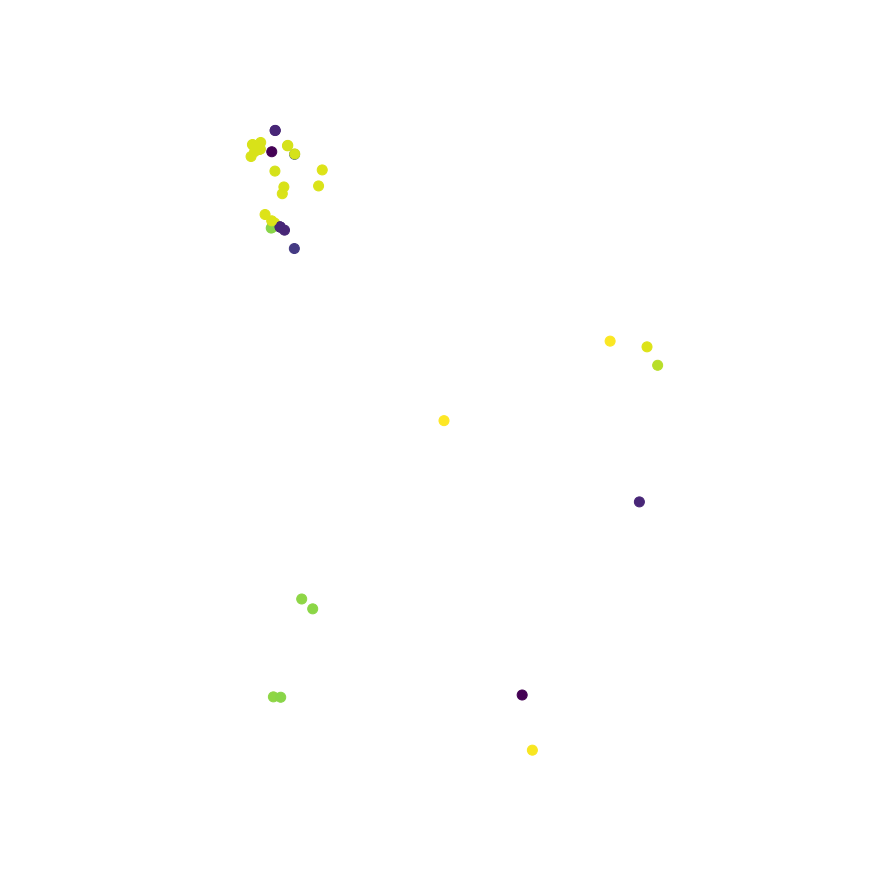

Covered area:


In [166]:
plt.figure(figsize=(16,16))
ax = plt.gca()

plt.scatter(embedding_original[:, 0], embedding_original[:, 1], s=100, c=[coloring[n.name] for n in P_nodes])

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
# plt.savefig('embedding_prediction.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
print("Covered area:")


Aiming to cover: 0.8803693652903254
That is 22.009234132258136%
     pcost       dcost       gap    pres   dres
 0: -1.8016e+01 -3.1618e+01  6e+02  8e+00  6e+00
 1: -1.1357e+01 -7.5150e+01  2e+02  3e+00  2e+00
 2: -1.0179e+01 -4.8461e+01  8e+01  8e-01  6e-01
 3: -1.0892e+01 -3.0259e+01  4e+01  4e-01  3e-01
 4: -8.8428e+00 -1.9356e+01  2e+01  2e-01  1e-01
 5: -6.6235e+00 -1.4720e+01  2e+01  1e-01  8e-02
 6: -4.2164e+00 -7.9200e+00  1e+01  6e-02  4e-02
 7: -2.6284e+00 -5.1147e+00  9e+00  4e-02  3e-02
 8: -7.3658e-01 -2.6284e+00  6e+00  2e-02  1e-02
 9:  2.2134e-01 -2.0390e+00  6e+00  1e-02  9e-03
10:  1.2176e+00  7.9633e-01  9e-01  2e-03  1e-03
11:  1.3143e+00  1.2553e+00  1e-01  1e-04  1e-04
12:  1.3188e+00  1.2970e+00  3e-02  3e-05  2e-05
13:  1.3156e+00  1.3142e+00  2e-03  2e-06  1e-06
14:  1.3154e+00  1.3154e+00  4e-05  3e-08  2e-08
15:  1.3154e+00  1.3154e+00  1e-06  4e-10  3e-10
Optimal solution found.
Average displacement: 0.623024


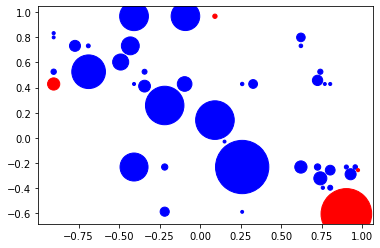

In [174]:
embedding = embedding_original.copy()

f = 0.49475
print("Aiming to cover: " + str(np.sum(np.square(np.sqrt(weights) * f * np.sqrt(2)))))
print("That is " + str(np.sum(np.square(np.sqrt(weights) * f * np.sqrt(2))) / 4 * 100) + "%")
assert N_points == len(embedding)

# variables xi's, yi's
P = 2 * np.eye(2 * N_points)
q = -  2 * np.concatenate((embedding[:, 0], embedding[:, 1])).reshape(-1, 1)


if False: # cost function depends on weights
    for i, w in enumerate(weights):
        P[i,i] *= w
        P[N_points + i, N_points + i] *= w
        q[i, 0] *= w
        q[N_points + i, 0] *= w

x_order = np.argsort(embedding[:, 0])
y_order = np.argsort(embedding[:, 1])

G = []
h = []

# constraint = np.zeros(2 * N_points)
# constraint[-1] = -1
# G.append(constraint)
# h.append(0)

for i in range(N_points - 1):
    xi = x_order[i]
    xi_plus_1 = x_order[i+1]
    constraint = np.zeros(2 * N_points)
    constraint[xi] = 1
    constraint[xi_plus_1] = -1
    G.append(constraint)
    h.append(0)
    
for i in range(N_points - 1):
    yi = y_order[i]
    yi_plus_1 = y_order[i+1]
    constraint = np.zeros(2 * N_points)
    constraint[N_points + yi] = 1
    constraint[N_points + yi_plus_1] = -1
    G.append(constraint)
    h.append(0)

factor = np.sqrt(2)
for (idx, coef, val) in (
    (x_order[0], -1, 1-factor*f*np.sqrt(weights[x_order[0]])), # -1 < x0 => -x0 <= 1
    (x_order[-1], 1, 1-factor*f*np.sqrt(weights[x_order[-1]])), # xl < 1 => xl <= 1
    (N_points + y_order[0], -1, 1-factor*f*np.sqrt(weights[y_order[0]])), # -1 < y0 => -y0 <= 1
    (N_points + y_order[-1], 1, 1-factor*f*np.sqrt(weights[y_order[-1]])), # yl < 1 => yl <= 1
):
    constraint = np.zeros(2 * N_points)
    constraint[idx] = coef
    G.append(constraint)
    h.append(val)

# for (idx, coef, w) in (
#     (x_order[0], -1, factor*np.sqrt(weights[x_order[0]])), # -1+fw < x0 => -x0+fw <= 1
#     (x_order[-1], 1, factor*np.sqrt(weights[x_order[-1]])), # xl < 1-fw => xl+fw <= 1
#     (N_points + y_order[0], -1, factor*np.sqrt(weights[y_order[0]])), # -1+fw < y0 => -y0+fw <= 1
#     (N_points + y_order[-1], 1, factor*np.sqrt(weights[y_order[-1]])), # yl < 1-fw => yl+fw <= 1
# ):
#     constraint = np.zeros(2 * N_points+1)
#     constraint[idx] = coef
#     constraint[-1] = w
#     G.append(constraint)
#     h.append(1)

    
x_order = x_order.tolist()
y_order = y_order.tolist()

def constrain(pi, pj):
    assert pi != pj
    # wi + wj <= dist_x + dist_y
    # -(dist_x + dist_y) <= -(wi + wj)f
    # -(dist_x + dist_y) + (wi + wj)f <= 0
#     pix, piy = embedding[pi].tolist()
#     pjx, pjy = embedding[pj].tolist()
    constraint = np.zeros(N_points * 2)
    if x_order.index(pi) < x_order.index(pj):
        # dist_x = pj - pi
        constraint[pi] = 1
        constraint[pj] = -1
    else:
        constraint[pi] = -1
        constraint[pj] = 1
    if y_order.index(pi) < y_order.index(pj):
        # dist_y = pj - pi
        constraint[N_points + pi] = 1
        constraint[N_points + pj] = -1
    else:
        constraint[N_points + pi] = -1
        constraint[N_points + pj] = 1

    w = -(np.sqrt(weights[pi]) + np.sqrt(weights[pj])) * f
#     constraint[-1] = np.sqrt(weights[pi]) + np.sqrt(weights[pj])
    
    G.append(constraint)
    h.append(w)

for dim in (0,1):
    while len(np.unique(embedding[:, dim])) != N_points:
        embedding[:, dim] += np.random.normal(scale=1, size=N_points) * 0.000001
        print("Warning: duplicate coordinates. Randomly shifting coordinates a tiny bit.")
    
for pi in range(N_points):
    for pj in range(N_points):
        if pi == pj:
            continue
#         if pi < pj:
#             constrain(pi, pj)
#         continue
        if embedding[pi, 0] < embedding[pj, 0]:
            if embedding[pi, 1] < embedding[pj, 1]:
                one = (embedding[:, 0] > embedding[pi, 0]) & (embedding[:, 1] > embedding[pi, 1])
                two = (embedding[:, 0] < embedding[pj, 0]) & (embedding[:, 1] < embedding[pj, 1])
                if np.any(one & two):
                    continue
            elif embedding[pi, 1] > embedding[pj, 1]:
                one = (embedding[:, 0] > embedding[pi, 0]) & (embedding[:, 1] < embedding[pi, 1])
                two = (embedding[:, 0] < embedding[pj, 0]) & (embedding[:, 1] > embedding[pj, 1])
                if np.any(one & two):
                    continue
            else:
                raise ValueError()
            
        elif embedding[pi, 0] == embedding[pj, 0]:
            raise ValueError()
        else:
            continue
        constrain(pi, pj)
        
            
G = np.array(G).astype(np.double)
h = np.array(h).astype(np.double)

assert G.shape == (len(h), 2 * N_points )

P = P.astype(np.double)
q = q.astype(np.double)

assert P.shape == (2 * N_points , 2 * N_points )
assert q.shape == (2 * N_points , 1)

    
def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    P = .5 * (P + P.T)  # make sure P is symmetric
    args = [cvxopt.matrix(P), cvxopt.matrix(q)]
    if G is not None:
        args.extend([cvxopt.matrix(G), cvxopt.matrix(h)])
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((P.shape[1],))

result = cvxopt_solve_qp(P, q, G=G, h=h)
embedding[:, 0] = result[:N_points]
embedding[:, 1] = result[N_points:]

plt.scatter(embedding[:, 0], embedding[:, 1], s=[8000*n.pred for n in P_nodes], c=['r' if i in (x_order[0], x_order[-1], y_order[0], y_order[-1]) else 'b' for i in range(N_points)])
# plt.savefig('test.pdf')

print("Average displacement: "  + str(np.mean(np.linalg.norm(embedding_original - embedding, axis=1))))

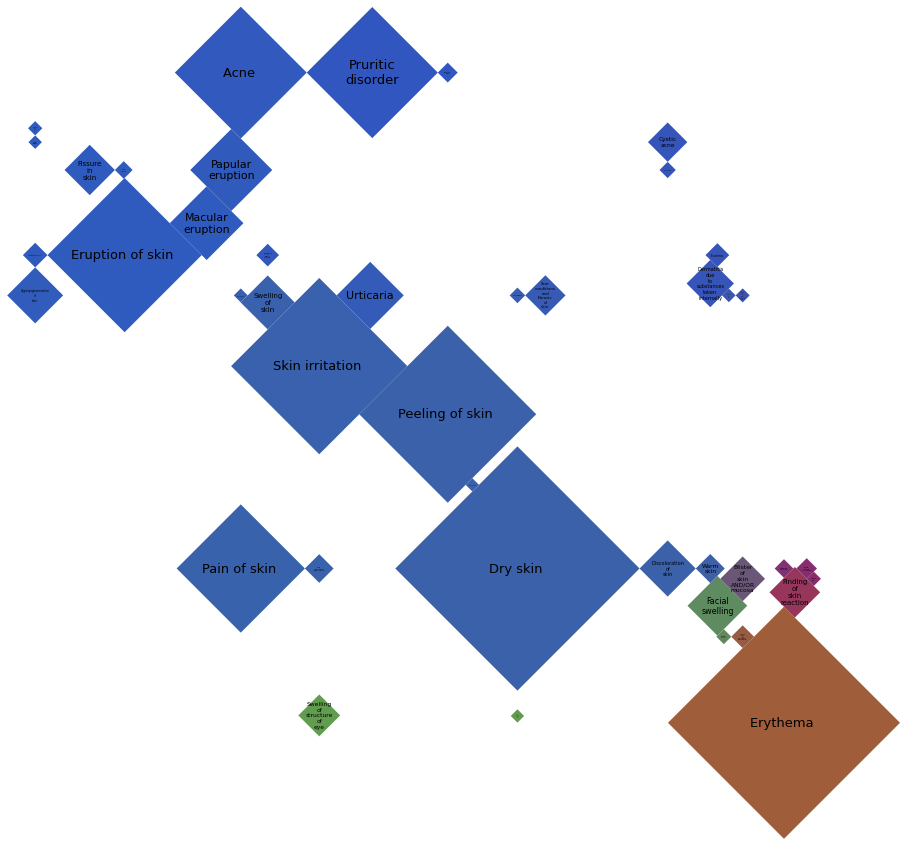

In [175]:
cmap = mpl.cm.get_cmap('viridis')


plt.figure(figsize=(16, 16))
ax = plt.gca()
for emb, n, emb_original in zip(embedding, P_nodes, embedding_original):
    rad = np.sqrt(n.pred) * f
    width = np.sqrt(2) * rad
    ax.add_patch(plt.Rectangle((emb[0] - rad, emb[1]), width, width, -45, fc=coloring4[n.name]))
#     x_values = [emb_original[0], emb[0]]
#     y_values = [emb_original[1], emb[1]]
#     plt.plot(x_values, y_values, 'bo', linestyle="--", markersize=3)
    name, fontsize = circle_name_fontsize(label_name(n.label), np.sqrt(n.pred) * f / 1.2)
    ax.text(*emb.tolist(), name, verticalalignment='center', horizontalalignment='center', fontsize=fontsize)#, size='smaller')

ax.set_aspect('equal')
xmin = min(embedding[i, 0] - np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
xmax = max(embedding[i, 0] + np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
ymin = min(embedding[i, 1] - np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
ymax = max(embedding[i, 1] + np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis('off')
plt.savefig(f'orthogonal_problem_{drug_nr}.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

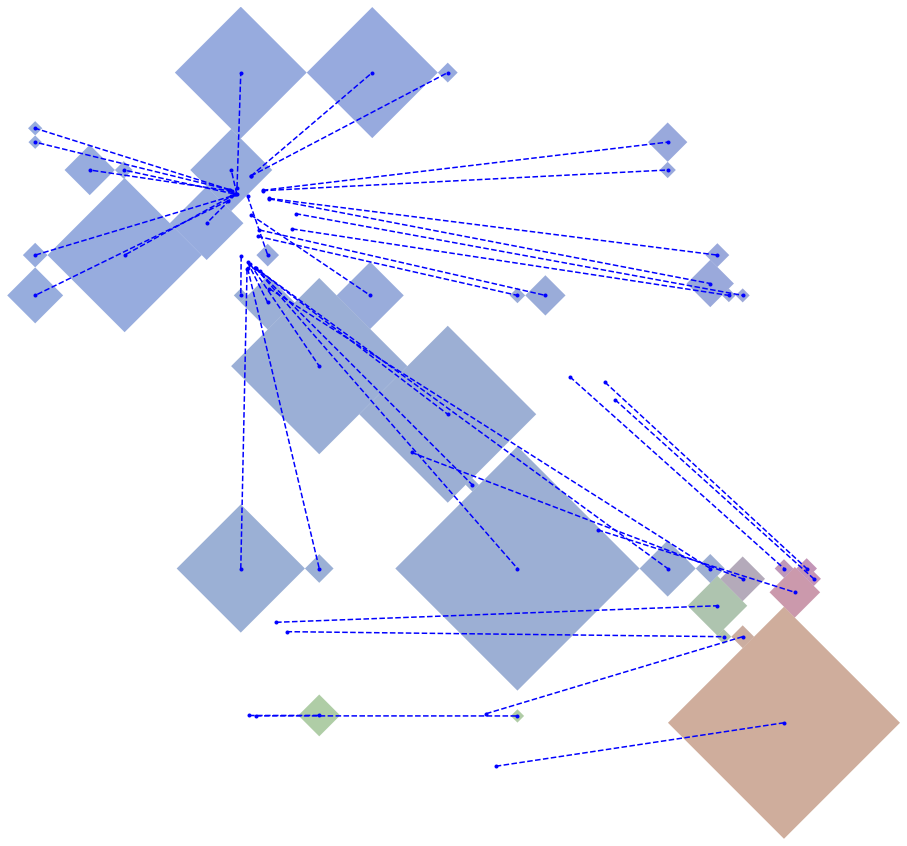

In [176]:
cmap = mpl.cm.get_cmap('viridis')


plt.figure(figsize=(16, 16))
ax = plt.gca()

for emb, n, emb_original in zip(embedding, P_nodes, embedding_original):
    rad = np.sqrt(n.pred) * f
    width = np.sqrt(2) * rad
    ax.add_patch(plt.Rectangle((emb[0] - rad, emb[1]), width, width, -45, fc=coloring4[n.name], alpha=0.5))
    x_values = [emb_original[0], emb[0]]
    y_values = [emb_original[1], emb[1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--", markersize=3)
#     if n.pred >= np.quantile(weights, 0.9) and False:
#         ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
#         ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
ax.set_aspect('equal')
xmin = min(embedding[i, 0] - np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
xmax = max(embedding[i, 0] + np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
ymin = min(embedding[i, 1] - np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
ymax = max(embedding[i, 1] + np.sqrt(n.pred) * f for i, n in enumerate(P_nodes))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis('off')
plt.savefig(f'orthogonal_problem_{drug_nr}_displacement.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
# print("Covered area:")

In [86]:
embedding_original = np.array([
    [-0.2,0],
    [-0.1,0.01],
    [-0.,0],
    [+0.1,0.01],
    [+0.2,-0.0],
#     [-0.1,0.00],
#     [+0.1,0.00],
#     [+0.0,-0.1*np.sqrt(2)],
    
])

N_points = len(embedding_original)
weights = np.array([1] * N_points)

P_nodes = [Node(i) for i in range(N_points)]
for n in P_nodes:
    n.pred = 1

f = 0.2670232471249818
target_coverage = 1.1199999999999999
Total movement 0.5259177559471871
Total overlaps 20
Total movement 0.021610082943021313
Total overlaps 10
Loss: 0.5243218790511508
Total movement 0.0016755368041311035
Total overlaps 6
Total movement 0.010476254801165747
Total overlaps 10
Loss: 0.5200687451739616
Total movement 0.007181074341176234
Total overlaps 4
Total movement 0.004849784225526683
Total overlaps 0
Loss: 0.520554332311865
Inside: 100.0%
Final f=0.2670232471249818.
Occupied area1.1199999999999999


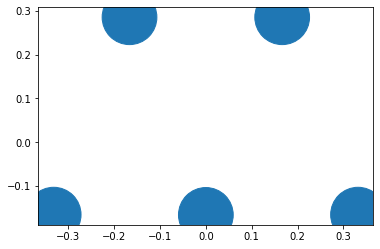

In [87]:
embedding = embedding_original.copy()
# ------- IMPROVING POINT ASSIGNMENT --------
max_movement = .3
movement_constant = 0.3

gradient_constant = 10
# movement_constant_cooldown = 0.02
gradient_constant_decay = 1.#0.99
gradient_constant_cooldown_decay = 1.#0.995
epsilon = 1e-3
epochs = 300
cooldown_period = 300
cooldown = False
window_size = 300
verbose = 50

target_coverage = 0.4 * 4

if False:
    extra_text += '_smaller'
    target_coverage /= 3

if False:
    extra_text += '_larger'
    target_coverage = 0.7 * 4

target_coverage *= 0.7 # REMOVE THIS LATER

gradient_constant = 1/(2 * np.max(weights))
gradient_constant_decay = np.power(epsilon, 1/epochs)

f = np.sqrt(target_coverage/(np.pi*np.sum(weights)))
# f = 0.5321736839256536
# f = 0.823661856314322
# f = 0.3519001083807359
print("f = " + str(f))
print("target_coverage = " + str(np.sum(np.power(f*np.sqrt(weights), 2)*np.pi)))
# f = 1.


radius = f * np.sqrt(weights)
radius_sum = np.tile(radius.reshape(-1, 1), (1, N_points)) + np.tile(radius.reshape(1, -1), (N_points, 1))

movements = np.zeros(epochs)

# distance_AB * f > np.sqrt(weightA) + np.sqrt(weightB) 
# cross_sum/distance < f
# for larger f, the distance_AB may be smaller
# for smaller f, the distance_AB must be larger
# maybe start with large f, and decrease it.

# move points away from eachother

filenames = []
wait = 1
for epoch in range(epochs):
    if epoch % wait == 0:
        wait += 1
        plt.figure(figsize=(12,12))
        ax = plt.gca()
        for emb, n, emb_original in zip(embedding, P_nodes, embedding_original):
            ax.add_patch(plt.Circle(emb.tolist(), np.sqrt(n.pred) * f, fc="red", alpha=.8)) # ec="white"
            x_values = [emb_original[0], emb[0]]
            y_values = [emb_original[1], emb[1]]
#             plt.arrow(*emb_original.tolist(), emb[0] - emb_original[0], emb[1] - emb_original[1], head_width=0.015, length_includes_head=True)
            plt.plot(x_values, y_values, 'bo', linestyle="--", markersize=3)
        ax.set_aspect('equal')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.axis('off')
        filename = f'temporary_store_{epoch}.png'
        filenames.append(filename)
        plt.savefig(filename, bbox_inches='tight', pad_inches = 0)
        plt.close()
    
    
    
    
    
    gradient_constant *= gradient_constant_decay
    if (epoch+1) % 1000 == 0:
        print("Epoch: ", str(epoch))
        print("Gradient: ", str(gradient_constant))
        plt.scatter(embedding[:, 0], embedding[:, 1], s=[10000*(n.pred)/f for n in P_nodes])
        plt.show()

#     within = (embedding[:, 0] < 1) & (embedding[:, 0] > -1) & (embedding[:, 1] < 1) & (embedding[:, 1] > -1)
#     print(f"Inside: {np.mean(within) * 100}%")
    
#     pw = similarity
    recompute_pw = True
    while recompute_pw:
        recompute_pw = False
        pw_inf = pairwise_distances(embedding)
        for i in range(N_points):
            pw_inf[i,i] = np.inf
        min_pw = np.min(pw_inf)
    #     print(f"Smallest pw: {min_pw}")
        indx_nonzero = (pw_inf == 0).nonzero()
        for i, j in zip(*indx_nonzero):
            embedding[i] += np.random.randn(2) / 10000
            recompute_pw = True
    min_pw = np.min(pw_inf)

    # move[x, y] = -(emb[x] - emb[y])
    move =  - (np.tile(embedding.reshape(N_points, 1, 2), (1, N_points, 1)) - np.tile(embedding.reshape(1, N_points, 2), (N_points, 1, 1)))
    pw_zero = pw_inf.copy()
    pw_zero[range(N_points), range(N_points)] = 0
    
    displacement_vector = embedding_original - embedding
    
    
    # -------------------
    # loss
    displacement_squared = np.sum(np.square(displacement_vector), axis=1)
    losses = weights * displacement_squared
    if (epoch+1) % 100 == 0:
        print("Loss: " + str(
            np.sum(losses)
        ))
    
    # -------------------
    # attracting based on embedding
    F_emb = 2 * weights.reshape(-1, 1) * displacement_vector * gradient_constant#* np.linalg.norm(displacement_vector, axis=1).reshape(-1, 1)
    
    
    # -------------------
    # pairwise repelling    
    # overlap_dist = r_1 + r_2 - |emb[x] - emb[y]|
    # if overlap_dist > 0, F = move[x, y]/|emb[x] - emb[y]| * overlap_dist / 2
    overlap_dist = radius_sum - pw_zero
#     print(overlap_dist)
    overlapping = (overlap_dist > 2 * epsilon)
    overlapping[range(N_points), range(N_points)] = False
    N_overlaps = np.sum(overlapping)
    overlap_dist = overlap_dist * overlapping
#     F_pw = - np.divide(overlap_dist, pw_inf) * 0.5 * movement_constant

    weights_left = np.tile(weights.reshape(N_points, 1), (1, N_points))
    weights_right = weights_left.T
    weights_sum = weights_left + weights_right
    
    
#     assert weights_left[1, 2] == weights[1] and weights_sum[2,1] == weights[2] + weights[1]
    F_pw = - np.divide(overlap_dist, pw_inf) * (
        (weights_right + epsilon) / (weights_sum + 2 * epsilon)
    ) * movement_constant
    
    assert F_pw.shape == pw_inf.shape

    F_pw = np.tile(F_pw.reshape(N_points, N_points, 1), (1, 1, 2)) * move
    F_pw = np.sum(F_pw, axis=1)
    # F_pw[x] = force vec of x

    # -------------------
    # repelling from edges
#     for dim in (0,1):
#         for i in np.where(embedding[:, dim] - radius < -1)[0]:
#             F_pw[i, dim] += - 1 - embedding[i, dim] + radius[i]
#         for i in np.where(embedding[:, dim] + radius > 1)[0]:
#             F_pw[i, dim] +=   1 - embedding[i, dim] - radius[i]
    
    # to ensure that repel>attraction
    pwrepel = np.linalg.norm(F_pw, axis=1) 
#     embattr = np.linalg.norm(F_emb, axis=1)
    F_sum = F_pw
    if not cooldown:
#         F_sum += F_emb
#         if N_overlaps == 0:
#             F_sum += F_emb
        for i in np.where(pwrepel == 0)[0]:
            F_sum[i] += F_emb[i]
    else:
        gradient_constant *= gradient_constant_cooldown_decay
#         max_movement *= 0.95
        cooldown_period -= 1

    movement = np.linalg.norm(F_sum, axis=1)
    too_fast_N = np.sum(movement > max_movement)
    if too_fast_N > 0:
        print("Max movement: ", str(too_fast_N))
    for i in np.where(movement > max_movement)[0]:
        F_sum[i] = F_sum[i] * (max_movement / movement[i])

    assert F_sum.shape == embedding.shape

    total_movement = np.sum(np.linalg.norm(F_sum, axis=1))
    movements[epoch] = total_movement
    if verbose != False:
        if epoch % verbose == 0:
            print("Total movement " + str(total_movement))
            print("Total overlaps " + str(N_overlaps))
    
    embedding = embedding + F_sum
    
#     if (epoch+1) % window_size == 0 and epoch > window_size:
#         if np.mean(movements[epoch - window_size//10:epoch]) >= np.mean(movements[epoch - window_size:epoch]):
#             cooldown = True
#             print("Started cooldown early")

    if total_movement < epsilon:
        print("Early stop at", epoch)
#         break
    
#     if not cooldown and epoch >= epochs-cooldown_period-1:
#         cooldown = True
#         print("Started cooldown")
#     elif cooldown and cooldown_period <= 0:
#         print("Exited cooldown")
#         break
    
within = (embedding[:, 0] < 1) & (embedding[:, 0] > -1) & (embedding[:, 1] < 1) & (embedding[:, 1] > -1)
print(f"Inside: {np.mean(within) * 100}%")
print(f"Final f={f}.")

occupied_area = np.sum(np.power(radius, 2) * np.pi)
print(f"Occupied area" + str(occupied_area))

diff_emb = embedding - embedding_original
plt.scatter(diff_emb[:, 0], diff_emb[:, 1], s=[800*np.sqrt(n.pred)/f for n in P_nodes])
plt.show()

In [88]:
# build gif
import os
import imageio
with imageio.get_writer('visualization_small.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

C:\Users\SEANMC~1\AppData\Local\Temp/ipykernel_12728/3362561934.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [120]:
pw = pairwise_distances(embedding)
radius = f * np.sqrt(weights)
radius_sum = np.tile(radius.reshape(-1, 1), (1, N_points)) + np.tile(radius.reshape(1, -1), (N_points, 1))

pw[range(N_points), range(N_points)] = np.infty
factor = np.min(pw / radius_sum)
print("Need to reduce the radius by " + "{:2.2f}".format((1-factor)*100) + "%")
f *= factor
print("f = " + str(f))
coverage = np.sum(np.power(f*np.sqrt(weights), 2)*np.pi)
print("coverage = " + str(coverage) + ", " + "{:2.2f}%".format(coverage/4 * 100))

x_min = min(embedding[i, 0] - np.sqrt(P_nodes[i].pred) * f for i in range(N_points))
x_max = max(embedding[i, 0] + np.sqrt(P_nodes[i].pred) * f for i in range(N_points))
y_min = min(embedding[i, 1] - np.sqrt(P_nodes[i].pred) * f for i in range(N_points))
y_max = max(embedding[i, 1] + np.sqrt(P_nodes[i].pred) * f for i in range(N_points))

print(f"Loss: ", str(np.sum(losses)))

Need to reduce the radius by 0.29%
f = 0.29355536847048214
coverage = 1.113425685015921, 27.84%
Loss:  0.06258495122217822


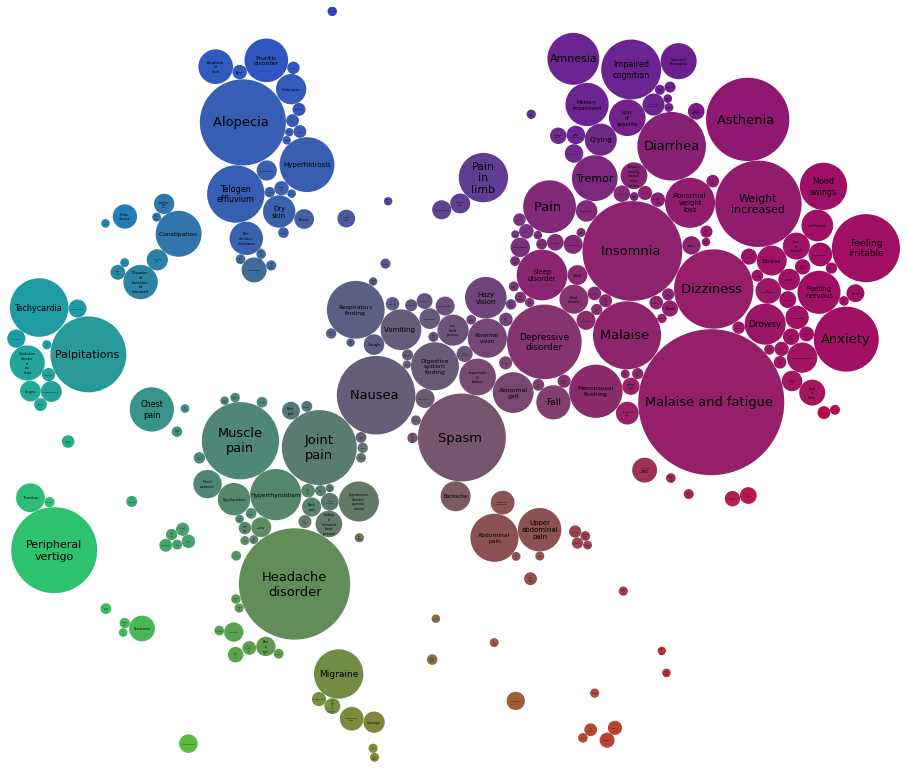

In [123]:
cmap = mpl.cm.get_cmap('viridis')

plt.figure(figsize=(16, 16))
ax = plt.gca()
# scatter = ax.scatter(x=embedding[:, 0], y=embedding[:, 1], s=20, c=[cmap(coloring2[n.name]) for n in P_nodes])
# handles, labels = scatter.legend_elements(prop="colors", alpha=1.0)

def fits(texts, radius, scale):
    for i, text in enumerate(texts):
        if len(texts) == 1:
            height = 0
        else:
            height = abs(i/(len(texts)-1) - 0.5) + 0.1
        width = np.sqrt(1 - height ** 2) * radius
        if len(text) + 4 > scale * width: # 200 for normal text size
            return False
    return True

def circle_name(text, radius, scale):
    listed = text.strip().split(' ')
    if fits([text], radius, scale):
        return text
    elif fits(listed, radius, scale):
        return '\n'.join(listed)
    else:
#         for j in range(len(listed) - 1, 0, -1):
#             sublist = listed[:j]
#             sublist[-1] += '...'
#             if fits(sublist, radius, scale):
#                 return '\n'.join(sublist)
        return False
    
def circle_name_fontsize(text, radius):
    for size, scale in [
        (13, 160),
        (11, 200),
        (9, 220),
        (8, 250),
        (7, 280),
        (6, 330),
        (5, 360),
        (4, 410),
        (3, 500),
        (2, 800),
        (1, 1400),
        (0.5, 2000),
        (0.25, 3000),
        (0.15, 3500),
        (0.07, 5000),
    ]:
        processed_text = circle_name(text, radius, scale)
        if processed_text != False:
            return processed_text, size
    return '', 1

T_P.attr_label()

for emb, n in zip(embedding, P_nodes):
    ax.add_patch(plt.Circle(emb.tolist(), np.sqrt(n.pred) * f, alpha=1., fc=coloring4[n.name])) # ec="white"
    desc = set([e for e in T_P.nodes[n.name].preds])
    label_name_n = label_name(n.label)
#     if len(desc) > 1:
#          label_name_n += f"\nSummarizes {len(desc)} terms"
    name, fontsize = circle_name_fontsize(label_name_n, np.sqrt(n.pred) * f)
    ax.text(*emb.tolist(), name, verticalalignment='center', horizontalalignment='center', fontsize=fontsize)#, size='smaller')
#     if n.pred > np.quantile(weights, 0.9):
#         ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
ax.set_aspect('equal')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# ax.legend(handles, [label_name(T.nodes[cat].label) for cat in categories[:-1]] + ["Other"], loc="upper right", title="Colors")

plt.axis('off')
# plt.savefig(f'bubbles_example_{drug_nr}{extra_text}.pdf', bbox_inches='tight', pad_inches = 0)
plt.savefig(f'visualization_colored_labeled.png', bbox_inches='tight', pad_inches = 0)
plt.show()

In [86]:
f

0.20262159282805697

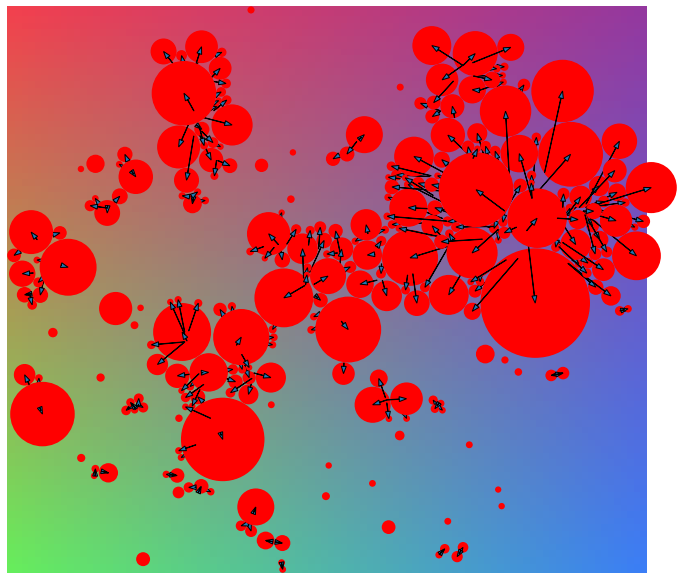

In [131]:
cmap = mpl.cm.get_cmap('viridis')

plt.figure(figsize=(12,12))
plt.imshow(colors_35, origin='lower', extent=[-1, 1, -1, 1], alpha=0.8)
ax = plt.gca()
for emb, n, emb_original in zip(embedding, P_nodes, embedding_original):
    ax.add_patch(plt.Circle(emb.tolist(), np.sqrt(n.pred) * f, fc="red", alpha=1.)) # ec="white"
    x_values = [emb_original[0], emb[0]]
    y_values = [emb_original[1], emb[1]]
    plt.arrow(*emb_original.tolist(), emb[0] - emb_original[0], emb[1] - emb_original[1], head_width=0.015, length_includes_head=True)
#     plt.plot(x_values, y_values, 'bo', linestyle="--", markersize=3)
ax.set_aspect('equal')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.axis('off')
# plt.savefig(f'bubbles_example_displacement{drug_nr}{extra_text}.pdf', bbox_inches='tight', pad_inches = 0)
plt.savefig(f'visualization_displaced_colormap.png', bbox_inches='tight', pad_inches = 0)
plt.show()

In [126]:
colors_35.shape

(100, 100, 3)

In [153]:

depths = tree.get_depths()

area_to_colors = []
for d in range(len(depths)):
    area_to_color = {n: [] for n in P_nodes}
    V_d = depths[d]
    for i, v in enumerate(V_d):
        Rv = v.preds
        for l in Rv:
            area_to_color[l].append(i)
    k = len(V_d)
    for key,value in area_to_color.items():
        if len(value) == 0:
            value.append(k)
            k+=1
    area_to_colors.append(area_to_color)

# ------- COMPUTE VORONOI --------
points = MultiPoint(embedding.tolist())

regions = voronoi_diagram(points)

min_x = -1
min_y = -1
max_x = 1
max_y = 1
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

P_to_region = {}
for i, node in enumerate(P_nodes):
    coord = embedding[i]
    p = Point(*coord)
    found = False
    for region in regions:
        if region.contains(p):
            assert not found
            found = True
            P_to_region[node] = region

# ------- PLOT --------

def path(coords):
    svg = "M" + "L".join([str(px) + "," + str(py) for px,py in coords]) + "Z" # could do coords[:-1] I think
    return svg

depth_choices = [len(depths)-1]#range(len(depths))#[0,1,2,3,4,5,10,15,20]
figs = []
for subplot_i, d in enumerate(depth_choices):
    fig = go.Figure()

    # Update axes properties
    fig.update_xaxes(
        showticklabels=False,
        showgrid=False,
        zeroline=False,
    )

    fig.update_yaxes(
        showticklabels=False,
        showgrid=False,
        zeroline=False,
        scaleanchor = "x",
        scaleratio = 1,
    )

    shapes = []
    colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=k)
    np.random.shuffle(colors)
    for i, node_with_pred in enumerate(P_nodes):
        region = P_to_region[node_with_pred]
        poly = region.intersection(box)
        polygon = [p for p in poly.exterior.coords]
    #     print(polygon)
    #     plt.fill(*zip(*polygon), alpha=0.4)

        assignments = area_to_colors[d][node_with_pred]
        color = colors[np.random.choice(assignments).item()]
        shapes.append(
            dict(
                type="path",
                path=path(polygon),
                fillcolor=color,
                line_color=color,
            )
        )


    # Add shapes
    fig.update_layout(
        shapes=shapes,
        xaxis_range=[-1,1],
        yaxis_range=[-1,1],
        hovermode="closest",
        height=1000, width=1000
    )
    
    for emb, n in zip(embedding, P_nodes):
        fig.add_annotation(
            x=emb[0],
            y=emb[1],
            text=label_name(n.label),
            showarrow=False,
            yshift=10
        )
        fig.add_annotation(
            x=emb[0],
            y=emb[1],
            text=label_type(n.label),
            showarrow=False,
            yshift=-10
        )
#         ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
#         ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
#     ax.set_aspect('equal')
#     plt.xlim(-1, 1)
#     plt.ylim(-1, 1)
#     plt.show()

    figs.append(fig)

for depth, fig in zip(depth_choices, figs):
    print("Depth of ", depth)
    fig.show()

C:\Users\SEANMC~1\AppData\Local\Temp/ipykernel_15496/1752367139.py:34: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for region in regions:


Depth of  27


In [154]:
from visualize_events import HexMerge
alg = HexMerge()

alg.fit(tree)
fig = alg.make_fig()

KeyError: P:2, C:3 NODE: Skin AND/OR mucosa finding (finding)

In [ ]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()


In [ ]:
import cplex

def setproblemdata(p):
    p.objective.set_sense(p.objective.sense.maximize)

    p.linear_constraints.add(rhs = [20.0, 30.0], senses = "LL")

    obj  = [1.0, 2.0, 3.0]
    ub   = [40.0, cplex.infinity, cplex.infinity]
    cols = [[[0,1],[-1.0, 1.0]],
            [[0,1],[ 1.0,-3.0]],
            [[0,1],[ 1.0, 1.0]]]
    
    p.variables.add(obj = obj, ub = ub, columns = cols,
                    names = ["one", "two", "three"])

    qmat = [[[0,1],[-33.0, 6.0]],
            [[0,1,2],[ 6.0,-22.0, 11.5]],
            [[1,2],[ 11.5, -11.0]]]


    p.objective.set_quadratic(qmat)
    Q = cplex.SparseTriple(ind1 = ["one","two","three"], ind2 = [0,1,2],
                           val = [1.0] * 3)
    p.quadratic_constraints.add(rhs = 1.0, quad_expr = Q, name = "Q")

def setproblemdata_real(p):
    """
    sum w(v) (emb(v) - c(v)) ^2 = w(v) emb(v)^2 - 2w(v)c(v)emb(v) + w(v)c(v)^2
    """
    t = p.variables.type
    p.variables.add(#obj = [1.0, 2.0, 3.0],
              lb = [-cplex.infinity] * 2 * N_points,
              ub = [cplex.infinity]  * 2 * N_points,
              types = [t.continuous] * 2 * N_points,
              names = [f"x{i}" for i in range(N_points)] + [f"y{i}" for i in range(N_points)],
    )
    
    p.objective.set_sense(p.objective.sense.minimize)
    
    qmat = [
        [[i], [weights[i]]] for i in range(N_points)
    ] + [
        [[N_points + i], [weights[i]]] for i in range(N_points)
    ]
    p.objective.set_quadratic(qmat)
    
    qarr = [
        [i, -2 * weights[i] * embedding[i, 0]] for i in range(len(P_nodes))
    ] + [
        [N_points + i, -2 * weights[i] * embedding[i, 1]] for i in range(len(P_nodes))
    ]
    p.objective.set_linear(qarr)
    
    for i in range(N_points):
        for j in range(N_points):
            if i != j:
                p.quadratic_constraints.add(
                    quad_expr=[
                        [f"x{i}", f"x{j}", f"x{i}", f"y{i}", f"y{j}", f"y{i}"],
                        [f"x{i}", f"x{j}", f"x{j}", f"y{i}", f"y{j}", f"y{j}"],
                        [1, 1, -2, 1, 1, -2]],
                    sense='G',
                    rhs=(weights[i] + weights[j])**2,
                    name=f"q{i},{j}"
                )
    p.parameters.optimalitytarget.set(3)
    
    
def setproblemdata_simpler(p):
    """
    sum w(v) (emb(v) - c(v)) ^2 = w(v) emb(v)^2 - 2w(v)c(v)emb(v) + w(v)c(v)^2
    """
    t = p.variables.type
    p.variables.add(#obj = [1.0, 2.0, 3.0],
              lb = [-cplex.infinity] * 2 * N_points,
              ub = [cplex.infinity]  * 2 * N_points,
              types = [t.continuous] * 2 * N_points,
              names = [f"x{i}" for i in range(N_points)] + [f"y{i}" for i in range(N_points)],
    )
    
    p.objective.set_sense(p.objective.sense.minimize)
    
    qmat = [
        [[i], [weights[i]]] for i in range(N_points)
    ] + [
        [[N_points + i], [weights[i]]] for i in range(N_points)
    ]
    p.objective.set_quadratic(qmat)
    
    Q = np.zeros((N_points, N_points))
    for i in range(N_points):
        Q[i, i] = weights[i]
        Q[N_points + i, N_points + i] = weights[i]
        
    multiplier = 1.
    for i in range(N_points):
        for j in range(N_points):
            pass # TODO
    
    set_quadratic_coefficients(v1, v2, val)
    
    qarr = [
        [i, -2 * weights[i] * embedding[i, 0]] for i in range(len(P_nodes))
    ] + [
        [N_points + i, -2 * weights[i] * embedding[i, 1]] for i in range(len(P_nodes))
    ]
    p.objective.set_linear(qarr)
    
    for i in range(N_points):
        for j in range(N_points):
            if i != j:
                p.quadratic_constraints.add(
                    quad_expr=[
                        [f"x{i}", f"x{j}", f"x{i}", f"y{i}", f"y{j}", f"y{i}"],
                        [f"x{i}", f"x{j}", f"x{j}", f"y{i}", f"y{j}", f"y{j}"],
                        [1, 1, -2, 1, 1, -2]],
                    sense='G',
                    rhs=(weights[i] + weights[j])**2,
                    name=f"q{i},{j}"
                )
    p.parameters.optimalitytarget.set(3)
    
    
def qcpex1():

    p = cplex.Cplex()
    setproblemdata_real(p)

    p.solve()

    # solution.get_status() returns an integer code
    print("Solution status = " , p.solution.get_status(), ":")
    # the following line prints the corresponding string
    print(p.solution.status[p.solution.get_status()])
    print("Solution value  = ", p.solution.get_objective_value())

    numcols = p.variables.get_num()

    for j in range(numcols):
        print("Column %d:  Value = %10f" % (j, p.solution.get_values(j)))

    print(p.solution.get_linear_slacks(0))

    print()
    print("rhs    = ", p.quadratic_constraints.get_rhs("Q"))
    print("sense  = ", p.quadratic_constraints.get_senses(0))
    print("[lin]  = ", p.quadratic_constraints.get_linear_components(0,0)) # range
    print("[quad] = ", p.quadratic_constraints.get_quadratic_components([0])) # list
    print("[name] = ", p.quadratic_constraints.get_names()) # all as a list

    print()
    print("Objective function")
    print(" qnnz  = ", p.objective.get_num_quadratic_nonzeros())
    print(" quad  = ", p.objective.get_quadratic())
    print(" lin   = ", p.objective.get_linear())
    print(" sense = ", p.objective.get_sense())

    
qcpex1()


In [ ]:
N_points

# Design 2

In [ ]:
full_tree = T_P
tree = summary.copy()
# tree.root = tree.nodes[404684003] # clinical finding

tree.reset_pred()
# tree.descendant_pred()
tree.attr_label()

full_tree.attr_label()

N = None

nodes = None
sum_pred = full_tree.root.pred_agg

indx_P_nodes, P_nodes = [], []
for i, node in enumerate(full_tree.nodes.values()):
    if (node.pred is not None and node.pred != 0):
        indx_P_nodes.append(i)
        P_nodes.append(node)
P_N = len(P_nodes)

depths = tree.get_depths()

P_nodes_names = [n.name for n in P_nodes]
total_P = None

def comp_coords(assignment):
    x_last = 0
    x_partition = [x_last]
    for assigned in assignment:
        pred = P_nodes[assigned].pred
        x_last += pred / sum_pred
        x_partition.append(x_last)
    assert abs(x_partition[-1] - 1) < 1e-6
    return x_partition

P_nodes_color = [coloring[node.name] for node in P_nodes]
assignment = np.argsort(P_nodes_color)
# assignment = np.arange(P_N)
assert len(assignment) == P_N


nodes_in_tree = set(list(tree.nodes.keys()))

def local_cost(i):
    cost = 0
    P_node = P_nodes[assignment[i]]
    ancs_a = set(list(P_node.ancestors()))
    if i > 0:
        P_node_left = P_nodes[assignment[i-1]]
        ancs_b = set(list(P_node_left.ancestors()))
        diff = [n.name for n in ancs_a.symmetric_difference(ancs_b) if n.name in nodes_in_tree]
        cost -= len(diff)
        
    if i < P_N - 1:
        P_node_right = P_nodes[assignment[i+1]]
        ancs_b = set(list(P_node_right.ancestors()))
        diff = [n.name for n in ancs_a.symmetric_difference(ancs_b) if n.name in nodes_in_tree]
        cost -= len(diff)
    
    return cost

def local_change(i, j):
    cost_now = local_cost(i) + local_cost(j)

    temp = assignment[i]
    assignment[i] = assignment[j]
    assignment[j] = temp
    
    cost_then = local_cost(i) + local_cost(j)
    
    temp = assignment[i]
    assignment[i] = assignment[j]
    assignment[j] = temp
    
    return cost_then - cost_now

def cost(assignment):
    inverse_assignment = {P_nodes[j].name: i for i, j in enumerate(assignment)}
    cost = 0.
    for node in tree.nodes.values():
        to_draw = np.zeros(P_N+1, dtype=bool)
        full_tree_node = full_tree.nodes[node.name]
        for pred in full_tree_node.preds:
            if pred.name in P_nodes_names:
                block = inverse_assignment[pred.name]
                to_draw[block] = True
        last_draw_here = None
        time_since_last_draw = 0
        for draw_here in to_draw:
            if draw_here:
                if last_draw_here is not None:
                    cost += 1 + time_since_last_draw
                last_draw_here = draw_here
                time_since_last_draw = 0
            time_since_last_draw += 1
    return - cost

# best = cost(assignment)

# Nchanged = 0

# for i in range(1, P_N - 1):
#     rel_cost = np.zeros(P_N)
#     for j in range(i+1, P_N):
#         rel_cost[j] = local_change(i, j)
#     if np.min(rel_cost) != 0:
#         j = np.argmin(rel_cost)
#     else:
#         continue
#     temp = assignment[i]
#     assignment[i] = assignment[j]
#     assignment[j] = temp

for _ in range(0):
    i, j = np.random.choice(P_N, size=2, replace=False).tolist()
    changed = local_change(i, j) < 0
#     print(changed)
    if changed:
        Nchanged += 1
        temp = assignment[i]
        assignment[i] = assignment[j]
        assignment[j] = temp
#         assert cost(assignment) < best
#     else:
#         assert cost(assignment) == best
#     np.random.shuffle(assignment)
#     new_cost = cost(assignment)
#     if new_cost < best:
#         best = new_cost
#         best_assignment = assignment.copy()

inverse_assignment = {P_nodes[j].name: i for i, j in enumerate(assignment)}
x_partition = comp_coords(assignment)
    
print("Creating figure")
    
fig = go.Figure()

# Update axes properties
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    range=[0, 1],
    fixedrange=True
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
#     scaleanchor = "x",
#     scaleratio = 1,
#     range=[y_min - radius, y_max + radius]
)

def add_row(node, y=None, y_bottom=None, opacity=1., text=True):
    to_draw = np.zeros(P_N+1, dtype=bool)
    if y_bottom is None:
        y_bottom = y - (1/len(tree.nodes))
    full_tree_node = full_tree.nodes[node.name]
    for pred in full_tree_node.preds:
        if pred.name in P_nodes_names:
            print(coloring[pred.name])
            block = inverse_assignment[pred.name]
            fig.add_trace(
                go.Scatter(x=[x_partition[block], x_partition[block], x_partition[block+1], x_partition[block+1]], y=[y, y_bottom, y_bottom, y], fill="toself", opacity=opacity,
                mode="none", fillcolor=get_c(coloring[pred.name]),
                textposition="bottom right",
                text=text, visible=True
            )) # mode="lines"
            to_draw[block] = True
    x_coords, y_coords = [], []
    prev = False
    for i, draw_here in enumerate(to_draw):
        if prev == False and draw_here == True:
            if len(x_coords) > 0:
                x_coords.append(None)
                y_coords.append(None)
            x_coords.append(x_partition[i])
            x_coords.append(x_partition[i])
            y_coords.append(y)
            y_coords.append(y_bottom)
        elif prev == True and draw_here == False:
            x_coords.append(x_partition[i])
            x_coords.append(x_partition[i])
            y_coords.append(y_bottom)
            y_coords.append(y)

            x_coords.append(x_coords[len(x_coords) - 4])
            y_coords.append(y_coords[len(y_coords) - 4])
        prev = draw_here
    if text == False:
        text = ''
    else:
        text = [node.label] + ['' for _ in range(len(x_coords) - 1)]
    print(len(x_coords))
    return
    fig.add_trace(
        go.Scatter(x=x_coords, y=y_coords, fill="toself", opacity=opacity,
        mode="none", fillcolor=get_c(coloring[node.name]),
        textposition="bottom right",
        text=text, visible=True
    )) # mode="lines"
#     print(any(e for e in to_draw))

    # modes: none, lines, text, markers
# P_N_in_tree = [n for n in tree.nodes.values() if not (n.pred is None or n.pred == 0.)]
# y = - (len(tree.nodes) - len(P_N_in_tree)) / len(tree.nodes)
# y = - (len(nodes) - P_N_in_tree) / len(nodes)

#for V_d in depths:
#    for node in V_d:
#        if T_P.nodes[node.name].pred is not None and T_P.nodes[node.name].pred > 0:
#         if not (node.pred is None or node.pred == 0.):
#            if node.name in summary.nodes.keys():
#                 add_row(node, y=0, y_bottom=min(y*1.2, y-1/len(tree.nodes)), opacity=0.1, text=False)
#                 add_row(node, y=y, y_bottom=min(y*1.2, y-1/len(tree.nodes)))

# all ordered
if True:
    y = 0
    nodes = list(summary.nodes.values())
    ws = [n.pred_agg for n in nodes]
    order = np.argsort(ws)
    ordered_nodes = [nodes[o] for o in order[::-1]]
    for node in ordered_nodes:
        add_row(node, y=y)
        y -= 1 / len(tree.nodes)
else:
    y = 0
    for V_d in depths:
        for node in V_d:
            if node.pred is None or node.pred == 0.:
                add_row(node, y=y)
                y -= 1 / len(tree.nodes)

config = dict({'scrollZoom': True})
fig.update_layout(
    autosize=False,
    width=600,
    height=290,
    showlegend=False,
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    yaxis={'range':[-1,0]}
)
# fig.show()#config=config)

fig.write_image('extracted_stacked.pdf')

In [ ]:
fig

In [ ]:
def get_color(colorscale_name, loc):
    from _plotly_utils.basevalidators import ColorscaleValidator
    # first parameter: Name of the property being validated
    # second parameter: a string, doesn't really matter in our use case
    cv = ColorscaleValidator("colorscale", "")
    # colorscale will be a list of lists: [[loc1, "rgb1"], [loc2, "rgb2"], ...] 
    colorscale = cv.validate_coerce(colorscale_name)
    
    if hasattr(loc, "__iter__"):
        return [get_continuous_color(colorscale, x) for x in loc]
    return get_continuous_color(colorscale, loc)
        

# Identical to Adam's answer
import plotly.colors
from PIL import ImageColor

def get_continuous_color(colorscale, intermed):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    hex_to_rgb = lambda c: "rgb" + str(ImageColor.getcolor(c, "RGB"))

    if intermed <= 0 or len(colorscale) == 1:
        c = colorscale[0][1]
        return c if c[0] != "#" else hex_to_rgb(c)
    if intermed >= 1:
        c = colorscale[-1][1]
        return c if c[0] != "#" else hex_to_rgb(c)

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    if (low_color[0] == "#") or (high_color[0] == "#"):
        # some color scale names (such as cividis) returns:
        # [[loc1, "hex1"], [loc2, "hex2"], ...]
        low_color = hex_to_rgb(low_color)
        high_color = hex_to_rgb(high_color)

    return plotly.colors.find_intermediate_color(
        lowcolor=low_color,
        highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb",
    )

get_c = lambda x: get_color(px.colors.sequential.Viridis, x)

# Design 3

In [ ]:
from visualize_events import HexMerge
alg = HexMerge(fraction_occupied_hexes=0.9, distance_factor=0.01, adjacency_factor=0, kmax=0)
alg.fit(tree)
fig = alg.make_fig()

In [ ]:
# A={0,1}x[0,n]x[0,m] -> P
# 2nm places -> P

# nodes_df = pd.DataFrame({'name':[0,1,2,3,4,5],'label':[0,1,2,3,4,5]}).set_index('name')
# edges_df = pd.DataFrame({'parent':[0, 0, 0, 1, 2, 3,1],'child':[1, 2, 3, 4, 4, 4,5]})
# diamond_tail = DAG(nodes_df, edges_df)
# predictions = pd.Series([1, 1], index=[4, 5])
# t = diamond_tail.set_predictions(predictions)

# ---------- PARAMS
t = C

target_hexes = 1000
kmax = 0
same_leaf_factor = 1
adjacency_factor = 1
distance_factor = 100
hexes_scaling = lambda x : x
temperature = lambda k, kmax: (1 - (k)/kmax) ** 2 / 20 #.1/np.exp(k / 100).item()
acceptance_function = lambda cost_diff, T, rv: cost_diff < 0 or np.exp((-cost_diff+0.01)/T) >= rv
quantile = .0
moved_running_avg_window = 10000
MOVED_LOWERBOUND = 0.03
# hexes_scaling = lambda x : 1 + np.sqrt(x).item() # PARAM.


# ---------- PLOTTING PARAMS
angle = - np.pi / 6
radius = 1/np.sqrt(3)
angles = np.array([angle + k * (np.pi/3) for k in range(6)])
x_hex = radius * np.cos(angles)
y_hex = radius * np.sin(angles)
x_width = np.amax(x_hex) - np.amin(x_hex)
y_width = np.amax(y_hex) - np.amin(y_hex)

def center(row, col):
    cx = (col * radius * 1.5)
    cy = np.sqrt(3) * row
    if col % 2 == 1:
        cy = cy + np.sqrt(3) * 0.5
    return cx, cy

def cartesian(a, r, c):
    return (
        a/2 + c,
        np.sqrt(3) * (a/2 + r)
    )



n = int(np.sqrt(target_hexes) // 2)
m = int(np.sqrt(target_hexes))
assert 2 * n * m <= target_hexes

scaled = [hexes_scaling(P_node.pred) for P_node in t.nodes.values() if P_node.pred is not None]
sum_scaled = sum(scaled)
to_place = []

nodes = list(t.nodes.values())
N = len(t)
indx_P_nodes, P_nodes = [], []
for i, node in enumerate(nodes):
    if (node.pred is not None and node.pred != 0):
        hexes = int(np.floor(hexes_scaling(node.pred) / sum_scaled * (2*n*m)).item())
        if hexes <= 0:
            continue
        indx_P_nodes.append(i)
        P_nodes.append(node)
        for _ in range(hexes):
            to_place.append(len(P_nodes) - 1)
P_N = len(P_nodes)


# to_place = [i for i, P_node in enumerate(P_nodes) for _ in range(int(np.floor(scaled[i] / sum_scaled * (2*n*m)).item()))]

assert 2 * n * m >= len(to_place)

t.add_parent_store()
from itertools import combinations
t.descendant_pred()
pred_nodes = t.root.preds
weights = dict()
for node in t.nodes.values():
    if node is t.root:
        continue
    significant_preds = [pred for pred in node.preds if pred in P_nodes]
    for a, b in combinations(significant_preds, 2):
        if a == b:
            assert False
        if id(a) > id(b):
            a, b = b, a
        w = weights.get((a, b), 0)
        weights[(a, b)] = w + 1 * node.depth

total_weight = sum(weights.values())

for k, v in weights.items():
    weights[k] = (v / total_weight) * adjacency_factor

# weight all adjacencies and all transitive stuff the same    
for P_node in P_nodes:
    weights[(P_node, P_node)] = same_leaf_factor / P_N

node_to_idx = {node: i for i, node in enumerate(P_nodes)}
new_weights = dict()
for k, v in weights.items():
    n1, n2 = k
    n1, n2 = node_to_idx[n1], node_to_idx[n2]
    new_weights[(n1, n2)] = v

weights = new_weights

# ------- DESIRED LOCATION --------
anc_store = t.get_ancestors()

dist = np.zeros((N, N))
for i, anc1 in enumerate(anc_store):
    for j, anc2 in enumerate(anc_store[i+1:], i+1):
#         common = anc1.intersection(anc2)
        diff = anc1.symmetric_difference(anc2)
        #d = 1/len(common)
#         d = 1/(sum(a.depth for a in common)+1)
        d = len(diff) / (len(anc1) + len(anc2))
        dist[i, j] = d
        dist[j, i] = d

similarity = dist[indx_P_nodes, :][:, indx_P_nodes]

tsne = TSNE(metric="precomputed",
            perplexity=30,
            early_exaggeration=10)
embedding = tsne.fit_transform(similarity)

x_min, y_min = cartesian(0, 0, 0)
x_max, y_max = cartesian(1, n, m)
# TODO might need to offset
x_scaler = MinMaxScaler(feature_range=(x_min,x_max))
y_scaler = MinMaxScaler(feature_range=(y_min,y_max))
embedding[:, 0] = x_scaler.fit_transform(embedding[:, 0].reshape(-1, 1)).reshape(-1)
embedding[:, 1] = y_scaler.fit_transform(embedding[:, 1].reshape(-1, 1)).reshape(-1)

# to_01_scaler = MinMaxScaler(feature_range=(0,1)).fit(embedding) # distorts distances because figure does not have asp ratio of 1

def neighbors(a, r, c):
    # interesting fact: if a and b are neighbors, and a is the x-th neighbor of b, then b is the (x+3%6)-th neighbor of a
    return (
        (a, r, (c+1) % m),
        (1-a, (r-(1-a)) % n, (c+a) % m),
        (1-a, (r-(1-a)) % n, (c-(1-a)) % m),
        (a, r, (c-1) % m),
        (1-a, (r+a) % n, (c-(1-a)) % m),
        (1-a, (r+a) % n, (c+a) % m)
    )

def cost(assignment):
    cost_matrix_adj = np.zeros((2, n, m, 6))
    it = np.nditer(assignment, flags=['multi_index'])
    for x in it:
        if x < 0:
            continue
        for neighbor_idx, neighbor in enumerate(neighbors(*it.multi_index)): # can make more eff due to symmetry 
            y = assignment[neighbor]
            if y < 0:
                continue
            w = weights.get((x.item(), y), 0)
            if w == 0:
                w = weights.get((y, x.item()), 0) # only one will exist atm
            if w != 0:
                cost_matrix_adj[(*it.multi_index, neighbor_idx)] = -w
    
    cost_matrix_dis = np.zeros((2, n, m))
    it = np.nditer(assignment, flags=['multi_index'])
    for x in it:
        if x < 0:
            continue
        tile_x, tile_y = cartesian(*it.multi_index)
        xx, xy = embedding[x].tolist()
        d = ((xx - tile_x)/(2*n-1)) ** 2 + ((xy - tile_y)/(m-1)) ** 2
        cost_matrix_dis[it.multi_index] = d
    cost_matrix_dis *= distance_factor

    cost_matrix_adj_sum = np.sum(cost_matrix_adj, axis=3)
    cost_agg = np.sum(cost_matrix_adj_sum) + np.sum(cost_matrix_dis)
    return cost_agg, cost_matrix_adj, cost_matrix_adj_sum, cost_matrix_dis

# def random_neighbor(s):
#     # SWITCHEROO
# #     x = np.random.choice(2), np.random.choice(n), np.random.choice(m)
# #     y = neighbors(*x)[np.random.choice(3)]
# #     s_new = s.copy()
# #     s_new[x], s_new[y] = s_new[y], s_new[x]
#     # RANDOM ASSIGNMENT
#     s_new = s.copy()
#     x = np.random.choice(2), np.random.choice(n), np.random.choice(m)
#     s_new[x] = np.random.choice(P_N+1) - 1
#     return s_new
     
# s = np.random.choice(P_N, replace=True, size=(2, n, m))

def cost_x(s, x):
    assignment = s[x]
    if assignment < 0:
        return [0] * 6, 0
    new_cost_x_neighbors = []
    for neighbor in neighbors(*x):
        neighbor_assignment = s[neighbor]
        if neighbor_assignment < 0:
            w = 0
        else:
            w = weights.get((assignment, neighbor_assignment), 0)
            if w == 0:
                w = weights.get((neighbor_assignment, assignment), 0)
        new_cost_x_neighbors.append(-w)

    xx, xy = cartesian(*x)
    yx, yy = embedding[assignment].tolist()
    d = ((xx - yx)/(2*n-1)) ** 2 + ((xy - yy)/(m-1)) ** 2
    d *= distance_factor
    return new_cost_x_neighbors, d

def set_cost_x(s, cost_matrix, cost_matrix_sum, x, cost_neighbors_x):
    # own
    cost_matrix[x] = cost_neighbors_x
    cost_matrix_sum[x] = np.sum(cost_matrix[x])
    # others'
    for neighbor_idx, neighbor in enumerate(neighbors(*x)):
        self_idx = (neighbor_idx + 3) % 6
        cost_matrix[(*neighbor, self_idx)] = cost_neighbors_x[neighbor_idx]
        cost_matrix_sum[neighbor] = np.sum(cost_matrix[neighbor])

def random_grid_point():
    return (np.random.choice(2), np.random.choice(n), np.random.choice(m))

# RANDOM LAYOUT
# for _ in range(2 * n * m - len(to_place)):
#     to_place.append(-1)
# s = np.array(to_place)
# np.random.shuffle(s)
# s = s.reshape(2, n, m)

# TODO better initialization - Greedy?
np.random.shuffle(to_place)
s = np.ones((2, n, m), dtype=int) * -1
# maintain a heap of: option -> max. cost reduction

def marginal_cost(s, x, assign):
    assert s[x] < 0
    s[x] = assign
    new_cost_x_neighbors, distance_cost = cost_x(s, x)
    marginal = 2 * sum(new_cost_x_neighbors) + distance_cost
    s[x] = -1
    return marginal

to_place_set = set(to_place)
options = np.zeros((2, n, m, P_N))
for a in (0,1):
    for r in range(n):
        for c in range(m):
            for assign in to_place_set:
                options[a, r, c, assign] = (
                    marginal_cost(s, (a, r, c), assign)
                )

to_place_still = {assign: to_place.count(assign) for assign in to_place_set}
to_place_still_total = len(to_place)
while to_place_still_total > 0:
    a, r, c, assign = np.unravel_index(np.argmin(options, axis=None), options.shape)
    s[(a, r, c)] = assign
    options[a, r, c, :] = np.infty
    to_place_still[assign] -= 1
    to_place_still_total -= 1
    if to_place_still_total == 0:
        break
    if to_place_still[assign] == 0:
        options[:, :, :, assign] = np.infty
        to_place_set.remove(assign)
    for neighbor in neighbors(a, r, c):
        if s[neighbor] < 0:
            for assign in to_place_set:
                if options[a, r, c, assign] != np.infty:
                    options[a, r, c, assign] = (
                        marginal_cost(s, (a, r, c), assign)
                    )  
                    
cost_s, cost_matrix_s, cost_matrix_s_sum, cost_matrix_s_distances = cost(s)
moved = 0
moved_running_avg = 0.
movable_points = None
for k in range(kmax):
    if k%1000==0:
        print(f"Cost: {np.sum(cost_matrix_s_sum) + np.sum(cost_matrix_s_distances)}. Running average % moved: {moved_running_avg}")
    T = temperature(k, kmax)
    # random neighbor testing
    if k % 10 == 0:
        moveable_points = np.arange(2*n*m)[cost_matrix_s_sum.reshape(-1) >= np.quantile(cost_matrix_s_sum, quantile)]
    x, y = np.random.choice(moveable_points, replace=False, size=2).tolist()
    x = (x//(n*m), (x//m)%n, x%m)
    y = (y//(n*m), (y//m)%n, y%m)
    if x == y: continue
    #
    old_assignment_x = s[x]
    old_assignment_y = s[y]
    old_cost_x = np.sum(cost_matrix_s[x]) + cost_matrix_s_distances[x]
    old_cost_y = np.sum(cost_matrix_s[y]) + cost_matrix_s_distances[y]
    
#     new_assignment = np.random.choice(P_N+1) - 1 # random choice of neighbor (different color in that hex)
    s[x], s[y] = old_assignment_y, old_assignment_x
    new_cost_x_neighbors, distance_cost_x = cost_x(s, x)
    new_cost_y_neighbors, distance_cost_y = cost_x(s, y)
    
    cost_diff = 2 * (
        sum(new_cost_x_neighbors) + distance_cost_x - old_cost_x
        + sum(new_cost_y_neighbors) + distance_cost_y - old_cost_y
    ) # times TWO because of double counting adjacency TODO half_neighbors?
    acceptance = acceptance_function(cost_diff, T, np.random.uniform())
    if acceptance:
        moved += 1
        just_moved = True
        set_cost_x(s, cost_matrix_s, cost_matrix_s_sum, x, new_cost_x_neighbors)
        set_cost_x(s, cost_matrix_s, cost_matrix_s_sum, y, new_cost_y_neighbors)
        cost_matrix_s_distances[x] = distance_cost_x
        cost_matrix_s_distances[y] = distance_cost_y
    else:
        just_moved = False
        s[x] = old_assignment_x
        s[y] = old_assignment_y
#     print(x, y)
    moved_running_avg = (
        (min(moved_running_avg_window-1, k) * moved_running_avg + just_moved)
        /min(moved_running_avg_window, k+1)
    )
    if moved_running_avg <= MOVED_LOWERBOUND and k > moved_running_avg_window:
        print(f"Early stop at k={k}")
        break
#     calc = cost(s)
#     assert (cost_matrix_s == calc[1]).all()
#     assert (cost_matrix_s_sum == calc[2]).all()
#     assert (cost_matrix_s_distances == calc[3]).all()
print(f"Moved {moved} out of {k} iters")

# PSEUDOCODE sim annealing
# Let s = s0
# For k = 0 through kmax (exclusive):

#     T ← temperature( 1 - (k+1)/kmax )
#     Pick a random neighbour, snew ← neighbour(s)
#     If P(E(s), E(snew), T) ≥ random(0, 1):
#         s ← snew

# Output: the final state 

assignment = s

# locations = [center(i, j) for i in range(10) for j in range(10)]

def svg_path(xc, yc, radius_modifier = 1.):
    return "M" + "L".join([str(px) + "," + str(py) for px,py in zip(xc + x_hex * radius_modifier, yc + y_hex * radius_modifier)]) + "Z"

def path(xc, yc, radius_modifier = 1.):
    x_coords = (xc + x_hex * radius_modifier).tolist()
    x_coords.append(x_coords[0])
    y_coords = (yc + y_hex * radius_modifier).tolist()
    y_coords.append(y_coords[0])
    return x_coords, y_coords


P_nodes_to_grid = {P_node: [] for P_node in P_nodes}

it = np.nditer(assignment, flags=['multi_index'])
for x in it:
    if x >= 0:
        P_nodes_to_grid[P_nodes[x]].append(it.multi_index)

t.attr_label()
depths = t.get_depths()    

colors_required = P_N + max(len(V_d) for V_d in depths)

colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=colors_required)
np.random.shuffle(colors)

# max_pred = max([P_node.pred for P_node in P_nodes])


In [ ]:
np.random.shuffle(colors)
fig = go.Figure()

# Update axes properties
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    range=[x_min - radius, x_max + radius]
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    scaleanchor = "x",
    scaleratio = 1,
    range=[y_min - radius, y_max + radius]
)

# ------- CREATE CONSTRAINTS --------
P_node_to_color = {P_node: color for P_node, color in zip(P_nodes, colors)} # shouldn't matter that colors is longer
d_P_node_occupancy = [{P_node: [] for P_node in P_nodes} for _ in depths]
v_to_color = dict()
for d in range(len(depths)):
    V_d = depths[d]
    # matrix of shape (V_d)
    # largest colors maintain.
    area_coverage = np.zeros(len(V_d))
    for i, v in enumerate(V_d):
        Rv = [pred for pred in v.preds if pred in P_nodes]
        coverage = []
        for P_node in Rv:
            d_P_node_occupancy[d][P_node].append(v)
            coverage += P_nodes_to_grid[P_node]
        area_coverage[i] = len(set(coverage))
    indxs = np.flip(np.argsort(area_coverage))
    
    remaining_colors = set(colors)
    for indx in indxs:
        v = V_d[indx]
        Rv = [pred for pred in v.preds if pred in P_nodes]
        max_col = -1
        max_size = -1
        for P_node in Rv:
            size = len(P_nodes_to_grid[P_node])
            col = P_node_to_color[P_node]
            if size > max_size and col in remaining_colors:
                max_size = size
                max_col = col
        if max_col == -1:
            max_col = remaining_colors.pop()
        else:
            remaining_colors.remove(max_col)
        v_color = max_col
        v_to_color[v] = v_color



disc = 100000
def simplify_grid_coords(grid_coords):
#     edges = [
#         grid_coord for grid_coord in grid_coords if not all(
#             neighbor in grid_coords for neighbor in neighbors(*grid_coord)
#         )
#     ]
#     while len(edges) != 0
    segments = dict()
    for grid_coord in grid_coords:
        cart = cartesian(*grid_coord)
        x_coords, y_coords = path(*cart)
        for i, neigh in enumerate(neighbors(*grid_coord)):
            if neigh not in grid_coords:
                x1, x2 = x_coords[i:i+2]
                y1, y2 = y_coords[i:i+2]
                x1 = int(round(x1 * disc))
                x2 = int(round(x2 * disc))
                y1 = int(round(y1 * disc))
                y2 = int(round(y2 * disc))
                adj = segments.get((x1, y1), [])
                adj.append((x2, y2))
                segments[(x1, y1)] = adj
    
    prev_point = list(segments.keys())[0]
    cycles = []
    current_cycle = [prev_point]
    while True:
        next_points = segments.get(prev_point, None)
        if next_points is None:
            cycles.append(current_cycle)
            if len(segments) == 0:
                break
            prev_point = list(segments.keys())[0]
            current_cycle = []
        elif len(next_points) == 1:
            del segments[prev_point]
            prev_point = next_points[0]
        else:
            prev_point = next_points.pop() # it matters which we pop!?
        
        current_cycle.append(prev_point)
    x_coord, y_coord = [], []
    for i, cycle in enumerate(cycles):
        if i > 0:
            x_coord.append(None)
            y_coord.append(None)
        for x_co, y_co in cycle:
            x_coord.append(x_co / disc)
            y_coord.append(y_co / disc)
    return x_coord, y_coord

v_to_trace = dict()
for d, V_d in enumerate(depths):
    for v in V_d:
        Rv = [pred for pred in v.preds if pred in P_nodes]
        x_coords = []
        y_coords = []
        for P_node in Rv:
#     color = colors[node_colors[0]]
            occupancy = d_P_node_occupancy[d][P_node]
            order = occupancy.index(v)
            radius = 1 - (order / len(occupancy))
            if radius < 1:
                continue
            for j, grid_coord in enumerate(P_nodes_to_grid[P_node]):
                if j > 0:
                    x_coords.append(None)
                    y_coords.append(None)
                location = cartesian(*grid_coord)
                x_coord, y_coord = path(*location, radius_modifier = radius)
#                 if len(occupancy) == 1:
#                     pass
#                 elif len(occupancy) in [2, 3]:
#                     slices = len(occupancy)
#                     slice_size = 6 // len(occupancy)
#                     idx = order * slice_size
#                     x_coord = x_coord[idx:idx + slice_size+1]
#                     y_coord = y_coord[idx:idx + slice_size+1]
#                     x_coord.append(location[0])
#                     y_coord.append(location[1])
#                     x_coord.append(x_coord[0])
#                     y_coord.append(y_coord[0])
#                 else:
#                     raise ValueError("hi")
                x_coords.extend(x_coord)
                y_coords.extend(y_coord)
        v_to_trace[v] = len(fig.data)
        fig.add_trace(go.Scatter(x=x_coords, y=y_coords, fill="toself", mode="text", fillcolor=v_to_color[v], name=v.label, visible=False)) # mode="lines"

nodes_left = sum(len(V_d) for V_d in depths)
nodes_seen = 0  
steps = []
for d, V_d in enumerate(depths):
    nodes_this_layer = len(V_d)
    nodes_left -= nodes_this_layer
    visible = [False] * nodes_seen + [True] * nodes_this_layer + [False] * nodes_left
    nodes_seen += nodes_this_layer
    for P_node in P_nodes:
        if P_node.depth < d:
            visible[v_to_trace[P_node]] = True

    step = dict(
        method="update",
        args=[{"visible": visible},
              {"title": "Depth: " + str(d)}],  # layout attribute
    )
    steps.append(step)
        
sliders = [dict(
    active=len(depths) - 1,
    currentvalue={"prefix": "Depth: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=-0.99
    )
)

config = {'responsive': False}

# go.FigureWidget(data=fig)

fig.show(config=config)


In [ ]:
t = C
t.descendant_pred()
t.add_parent_store()
t.aggregate_pred(aggregate='sum')
t.attr_label()

nodes = list(t.nodes.values())
sum_pred = sum(n.pred for n in nodes if n.pred is not None)
N = len(t)
indx_P_nodes, P_nodes = [], []
for i, node in enumerate(nodes):
    if (node.pred is not None and node.pred != 0):
        if node.pred > sum_pred / 100: # only significant stuff
            indx_P_nodes.append(i)
            P_nodes.append(node)
P_N = len(P_nodes)

depths = t.get_depths()

colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=P_N)
P_node_to_color = {P_node: colors[i] for i, P_node in enumerate(P_nodes)}

node_to_color = {}
for node in nodes:
    desc_preds = node.preds
    sum_preds = sum(desc.pred for desc in desc_preds)
    rgb = 0.
    for desc in desc_preds:
        desc_color = np.array([x for x in map(int, re.findall(r'\d+', P_node_to_color[desc]))])
        rgb += (1/len(desc_preds)) * np.square(desc_color)
    node_to_color[node] = 'rgb(' + ','.join([str(x) for x in np.sqrt(rgb)]) + ')'
#     max_pred = -1
#     desc = -1
#     for desc_pred in desc_preds:
#         if desc_pred.pred > max_pred:
#             max_pred = desc_pred.pred
#             desc = desc_pred
#     node_to_color[node] = P_node_to_color[desc]

source, target, value, color = [], [], [], []

node_to_index = {node: i for i, node in enumerate(nodes)}
for i, n in enumerate(nodes):
    for c in n.children:
        source.append(i)
        target.append(node_to_index[c])
        width = c.pred_agg
        width /= len(c.parents)
        value.append(width)
        color.append(node_to_color[n])

        

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [n.label for n in nodes],
      color = [node_to_color[n] for n in nodes]
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
      color = color,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import re
np.array([x for x in map(int, re.findall(r'\d+', colors[0]))])

In [ ]:
embedding = np.array([[0,0],[0,1],[1,1]])
N_points = len(embedding)
# move points away from eachother
pw = pairwise_distances(embedding)
for i in range(N_points):
    pw[i,i] = np.inf
indx = (pw == 0).nonzero()
for i, j in zip(*indx):
    pw[i,j] = np.inf
F = np.divide(0.1, pw * pw)
assert F.shape == pw.shape 
move = np.tile(embedding.reshape(N_points, 1, 2), (1, N_points, 1)) - np.tile(embedding.reshape(1, N_points, 2), (N_points, 1, 1))
displacement = np.tile(F.reshape(N_points, N_points, 1), (1, 1, 2)) * move
new = embedding + np.sum(displacement, axis=1)
print(embedding)
print(new)

In [ ]:
np.isnan(new).any()

In [ ]:
embedding[[44, 130]]

In [ ]:
embedding

In [ ]:
plt.scatter(x=embedding[:, 0], y = embedding[:, 1])
for i, lab in enumerate([n.label for n in P_nodes]):
    plt.annotate(lab, (embedding[i, 0], embedding[i, 1]))

In [ ]:
similarity

In [ ]:
regions[0]


In [ ]:


min_x = -max_norm_embedding
min_y = -max_norm_embedding
max_x = max_norm_embedding
max_y = max_norm_embedding
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]

    plt.fill(*zip(*polygon), alpha=0.4)

In [ ]:

min_x = -max_norm_embedding
min_y = -max_norm_embedding
max_x = max_norm_embedding
max_y = max_norm_embedding
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

# VORONOI COMPUTE
points = MultiPoint(embedding.tolist())

regions = voronoi_diagram(points, envelope=box)

# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon))


In [ ]:
# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon), alpha=0.4)


In [ ]:
F_edge = np.zeros(embedding.shape)
magnitude = np.linalg.norm(embedding, ord=5, axis=1)
F_edge[:, 0] = (-embedding[:, 0]) * magnitude
F_edge[:, 1] = (-embedding[:, 1]) * magnitude

In [ ]:
np.mean(np.linalg.norm(F_edge, axis=1))

In [ ]:
weights = np.array([p.pred for p in P])
cross = weights.reshape(-1, 1)@weights.reshape(1, -1)
weights.shape

In [ ]:
cross = weights.reshape(-1, 1)@weights.reshape(1, -1)

In [ ]:
cross.shape

In [ ]:
cross[5,4] == weights[5] * weights[4]

In [ ]:
test = np.arange(1000).reshape(10, 10, 10)
x = (1, 2)
test[x]


In [ ]:
for x in np.arange(2*n*m)[np.sum(cost_matrix_s, axis=3).reshape(-1) == 0]:
    coord = (x//(n*m), (x//m)%n, x%m)
    print(np.sum(cost_matrix_s, axis=3)[coord])

In [ ]:
cost_matrix_s_sum

In [ ]:
np.unravel_index(np.argmin(cost_matrix_s_sum, axis=None), cost_matrix_s_sum.shape)

In [ ]:
np.sum(options == np.min(options, axis=None))

In [ ]:
x = (dict(a=1))

In [ ]:
del x['a']
x